In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
import shutil as shutil

In [126]:
projectList = ["BOOKKEEPER", "STORM"]
datasetPathList = []

evaluationPath = "/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/{name_1}/Evaluation/{name_2}_Evaluation.csv"
boxOutputImagePath = "/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/{name}/Charts/Box/{imageTitle}.png"
lineOutputImagePath = "/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/{name}/Charts/Line/{imageTitle}.png"
imageDirectory = "/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/{name}/Charts/"

for projectName in projectList :
    datasetPathList.append(evaluationPath.format(name_1 = projectName, name_2 = projectName))

for projectName in projectList :
    directory = imageDirectory.format(name = projectName)
    if (os.path.isdir(directory)) :
        shutil.rmtree(path = directory)
    os.mkdir(directory)
    os.mkdir(directory + "/" + "Box")
    os.mkdir(directory + "/" + "Line")

['/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/BOOKKEEPER/Evaluation/BOOKKEEPER_Evaluation.csv',
 '/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/STORM/Evaluation/STORM_Evaluation.csv']

In [127]:
def getData(dataset, version, classifier, myFilter, sampler, isSensitive) :
    filteredDataset = dataset
    if (version != None) :
        filteredDataset = filteredDataset[(filteredDataset["TrainingRelease"] == version)]
    if (classifier != None) :
        filteredDataset = filteredDataset[(filteredDataset["ClassifierName"] == classifier)]
    if (myFilter != None) :
        filteredDataset = filteredDataset[(filteredDataset["FilterName"] == myFilter)]
    if (sampler != None) :
        filteredDataset = filteredDataset[(filteredDataset["SamplerName"] == sampler)]
    if (isSensitive != None) :
        filteredDataset = filteredDataset[filteredDataset["SensitiveLearning"] == isSensitive]
    
    return filteredDataset

In [128]:
def boxPlotData(projectName, dataset, classifierList, filter, sampler, costSensitive) :
    figure, axis = plt.subplots(2, 2)
    figure.set_size_inches(16,9)
    figure.subplots_adjust(hspace=0.3)

    titleString = "BoxPlot.Filter:{filterName}-Sampler:{samplerName}-IsSensitive:{sensitive}"
    titleString = titleString.format(filterName = filter, samplerName = sampler, sensitive = costSensitive)
    figure.suptitle(titleString)

    imagePath = boxOutputImagePath.format(name = projectName, imageTitle = titleString)

    recallList = []
    precisionList = []
    rocList = []
    kappaList = []
    for classifier in classifierList :

        data = getData(dataset, None, classifier, filter, sampler, costSensitive)
    
        precisionData = data["Precision"]
        precisionData = precisionData[precisionData.notnull()]
    
        recallData = data["Recall"]
        recallData = recallData[recallData.notnull()]

        rocData = data["ROC_AUC"]
        rocData = rocData[rocData.notnull()]

        kappaData = data["Kappa"]
        kappaData = kappaData[kappaData.notnull()]

        recallList.append(recallData)
        precisionList.append(precisionData)
        rocList.append(rocData)
        kappaList.append(kappaData)

    for i in range(0,2) :
        for j in range(0,2) :
            axis[i,j].set_xticklabels(classifierList)
            axis[i,j].set_ylim(-0.1, 1)


    axis[0,0].boxplot(recallList)
    axis[0,0].set_title("Recall")

    axis[0,1].boxplot(precisionList)
    axis[0,1].set_title("Precision")

    axis[1,0].boxplot(rocList)
    axis[1,0].set_title("ROC AUC")

    axis[1,1].boxplot(kappaList)
    axis[1,1].set_title("Kappa")

    plt.savefig(imagePath)
    #plt.show()
    

In [129]:
def linePlotData(projectName, dataset, versionList, classifierList, filter, sampler, isSensitive) :

    figure, axis = plt.subplots(nrows = 1, ncols = 3)
    figure.set_size_inches(16,5)
    figure.subplots_adjust(hspace=0.3)

    titleString = "LinePlot.Filter:{filterName}-Sampler:{samplerName}-IsSensitive:{sensitive}"
    titleString = titleString.format(filterName = filter, samplerName = sampler, sensitive = isSensitive)
    figure.suptitle(titleString)

    imagePath = lineOutputImagePath.format(name = projectName, imageTitle = titleString)

    for index in range(0, len(classifierList)) :
    
        classifier = classifierList[index]

        data = getData(dataset, None, classifier, filter, sampler, isSensitive)
    
        recallData = data["Recall"]
        precisionData = data["Precision"]
        rocData = data["ROC_AUC"]

        axis[0].plot(versionList, recallData, label = classifier)
        axis[0].set_title("Recall")
        
        axis[1].plot(versionList, precisionData, label = classifier)
        axis[1].set_title("Precision")

        axis[2].plot(versionList, rocData, label = classifier)
        axis[2].set_title("ROC_AUC")

    for i in range(0, 3) :
        axis[i].legend()
        axis[i].grid()
        axis[i].set_yticks(np.arange(0,1.1, 0.1))
        axis[i].set_xticks(np.arange(0, len(versionList), 1))


    plt.savefig(imagePath)
    #plt.show()

In [130]:
def analyzeProject(projectName) :

    datasetPath = evaluationPath.format(name_1 = projectName, name_2 = projectName)
    dataset = pd.read_csv(datasetPath)

    versions = dataset["TrainingRelease"].drop_duplicates().values
    classifiers = dataset["ClassifierName"].drop_duplicates().values
    filters = dataset["FilterName"].drop_duplicates().values
    samplers = dataset["SamplerName"].drop_duplicates().values
    sensitive = dataset["SensitiveLearning"].drop_duplicates().values

    for filter in filters :
        for sampler in samplers :
            for isSensitive in sensitive :
                if (sampler != "NotSet" and isSensitive) :
                    continue
                boxPlotData(projectName, dataset, classifiers, filter, sampler, isSensitive)
                linePlotData(projectName, dataset, versions, classifiers, filter, sampler, isSensitive)
                    

In [131]:
def analyzeAllProjetcs() :
    for projectName in projectList :
        analyzeProject(projectName)

/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)
/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)
/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)
/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)
/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)
/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)
/tmp/ipykernel_5051/3361058098.py:39: UserWarning: FixedFo

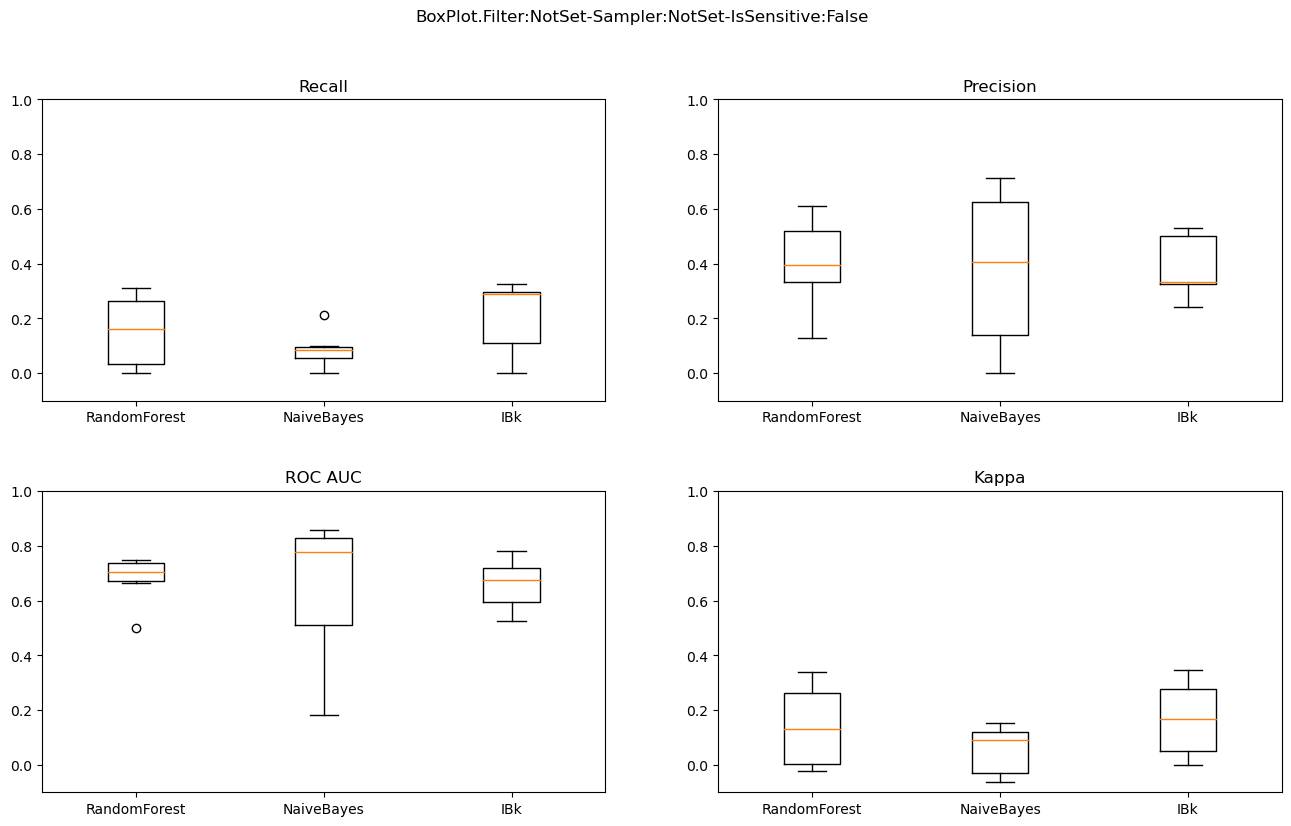

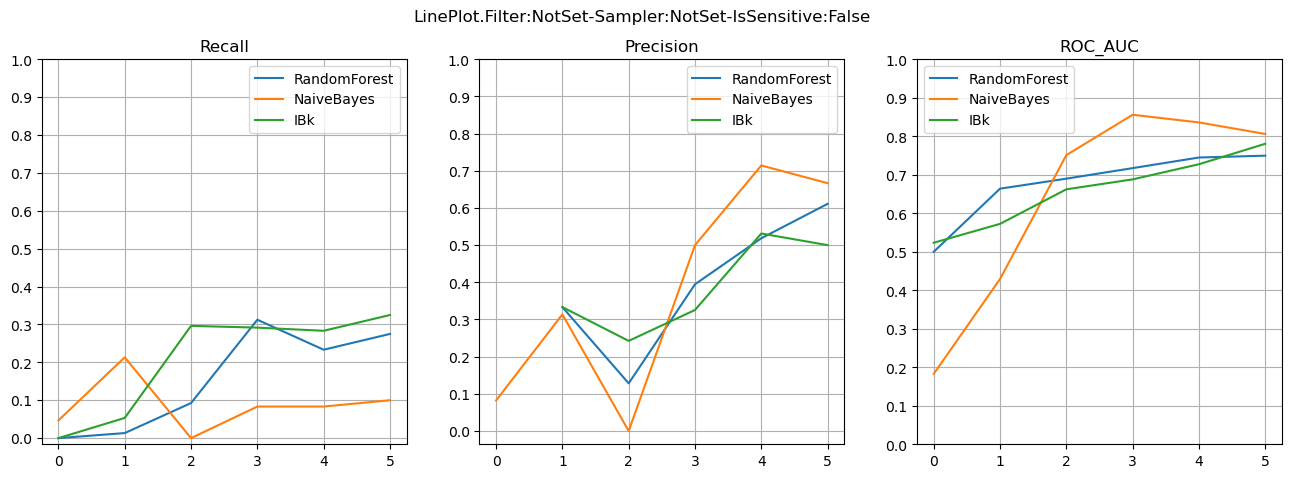

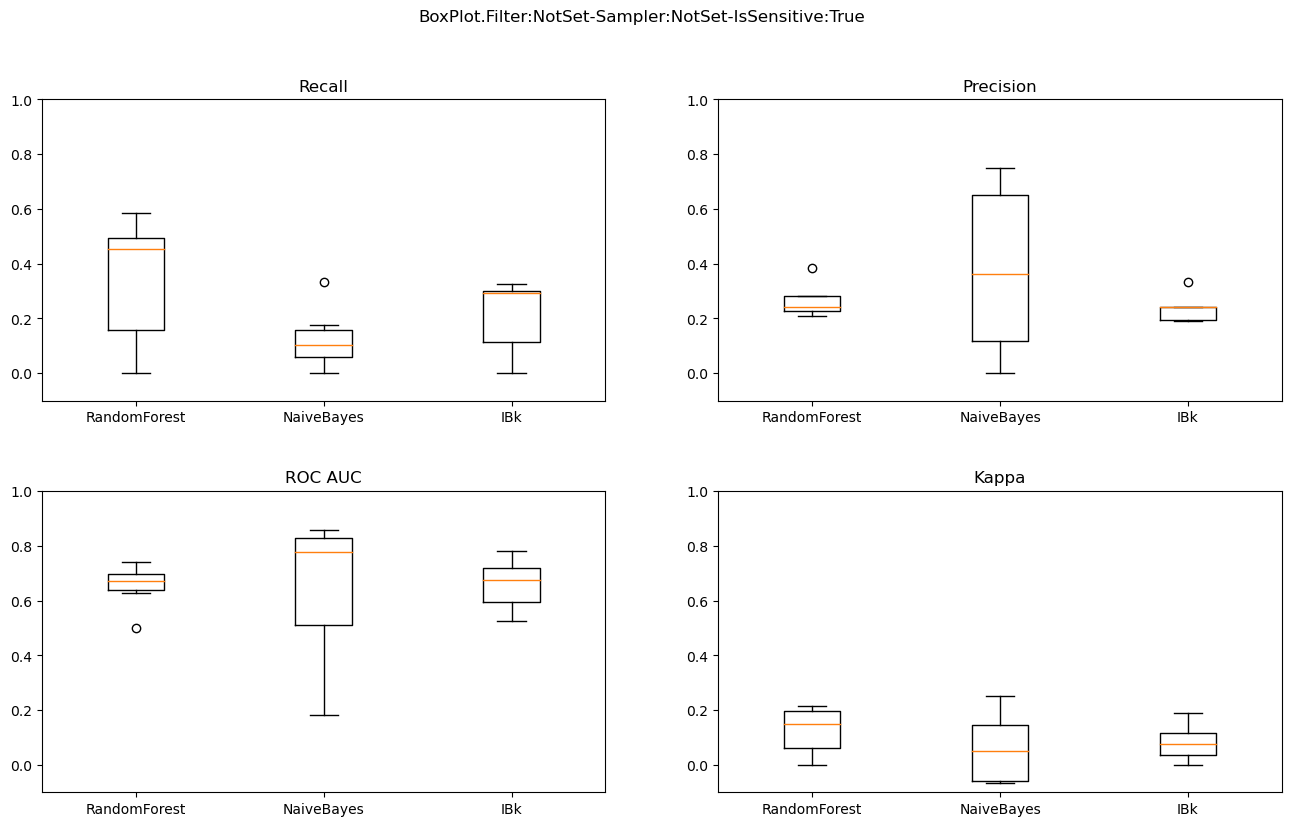

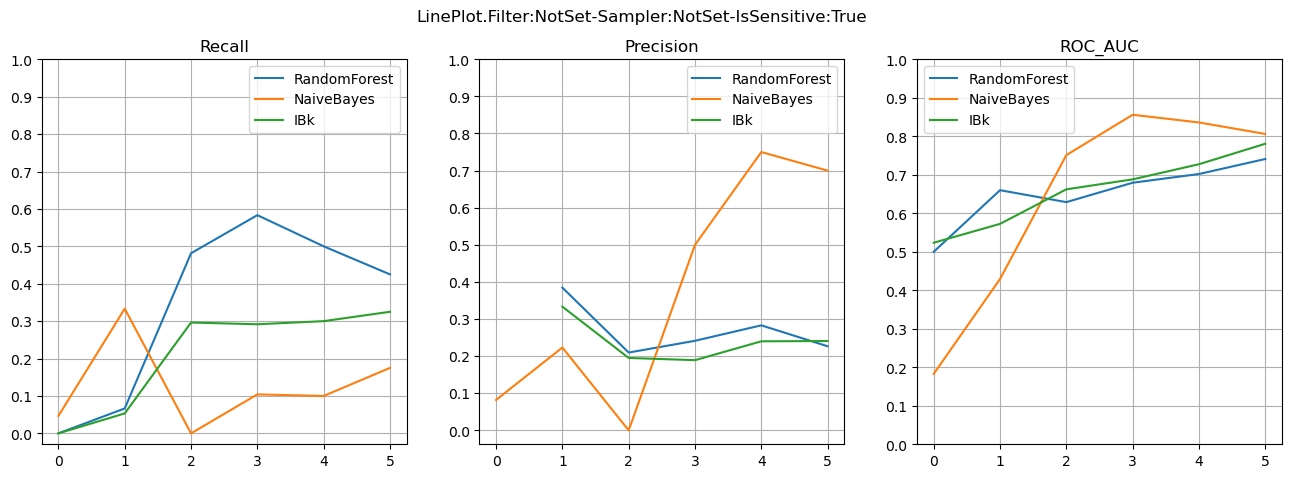

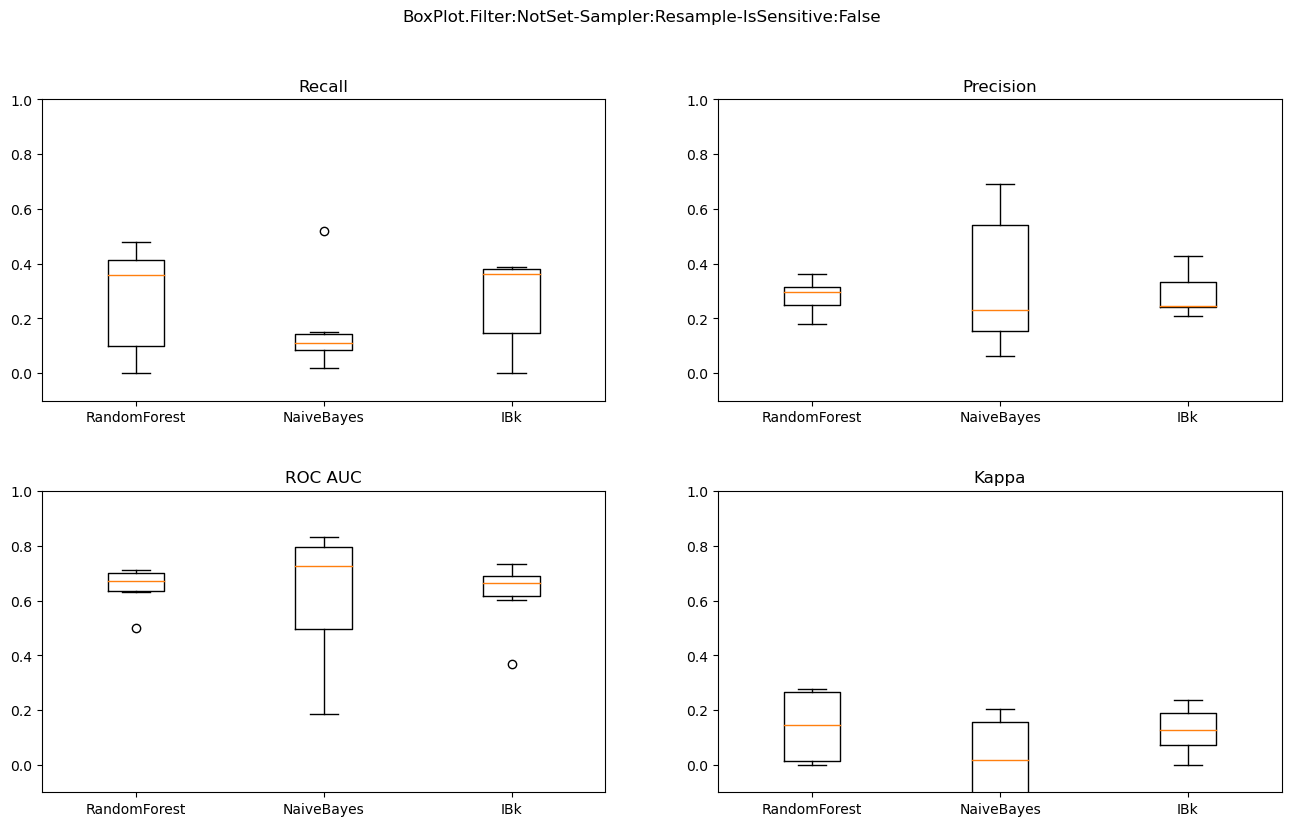

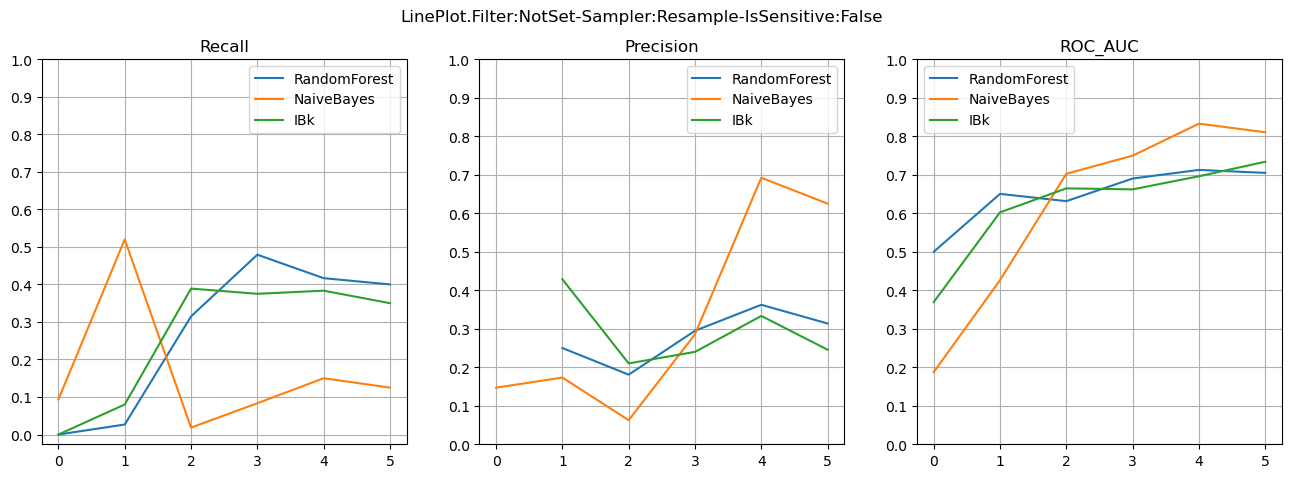

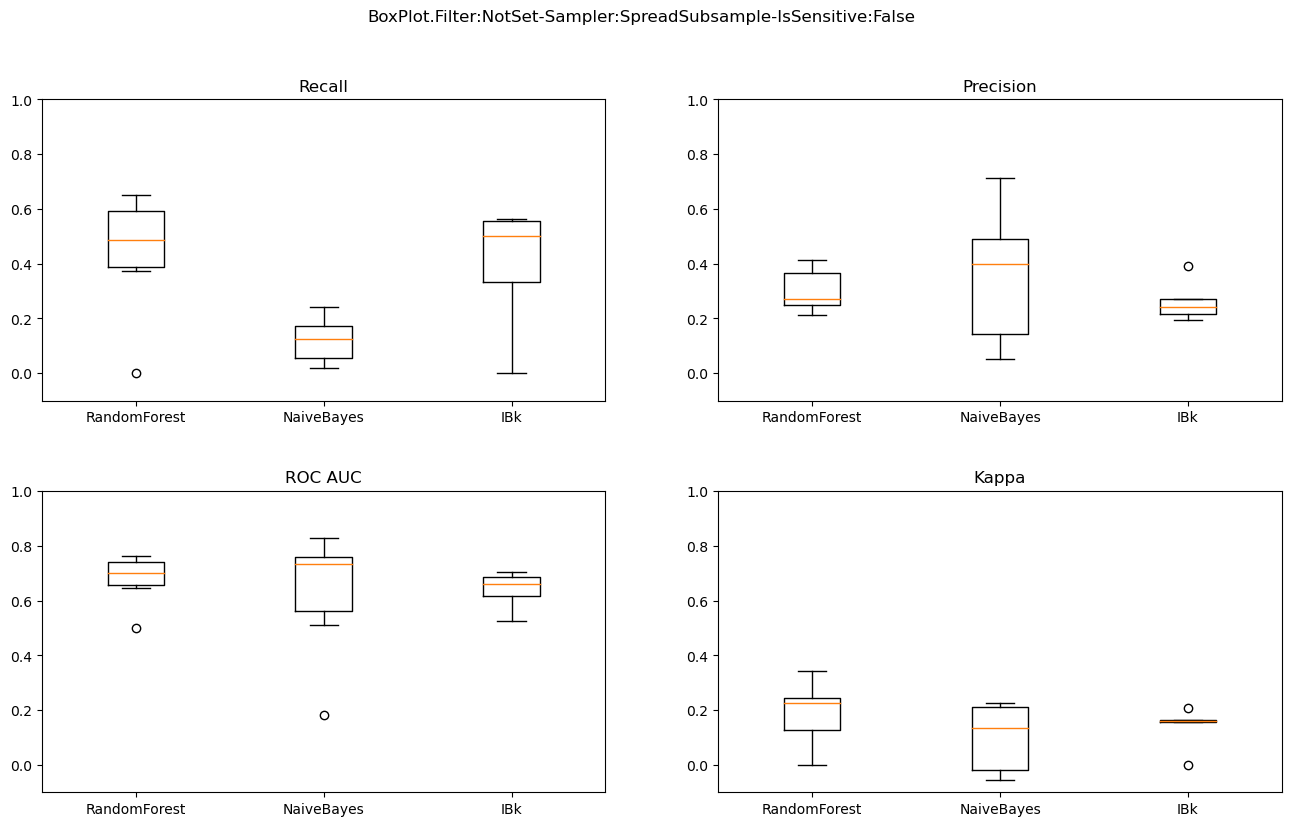

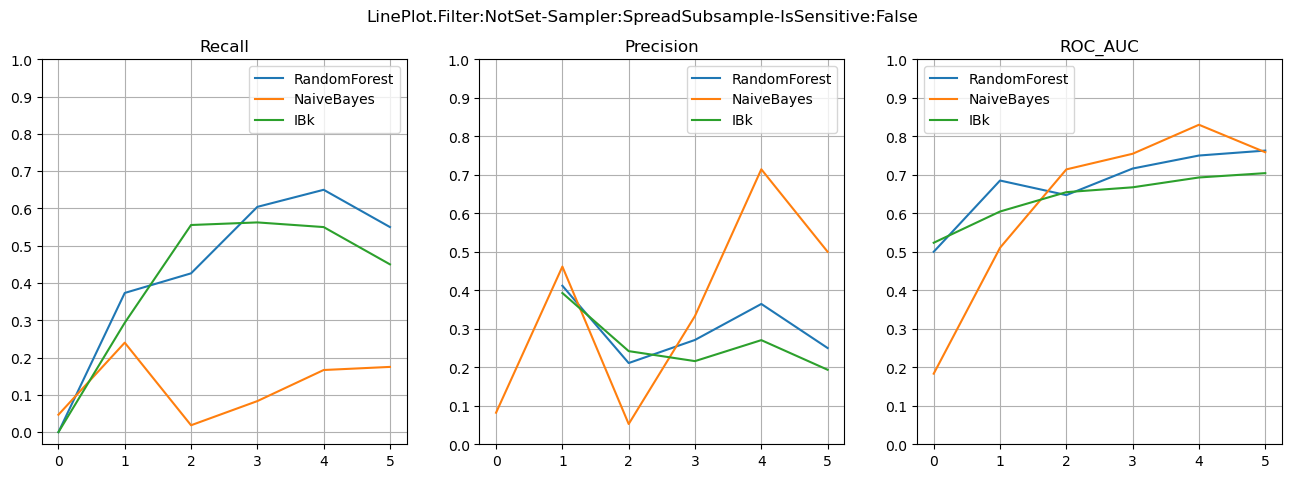

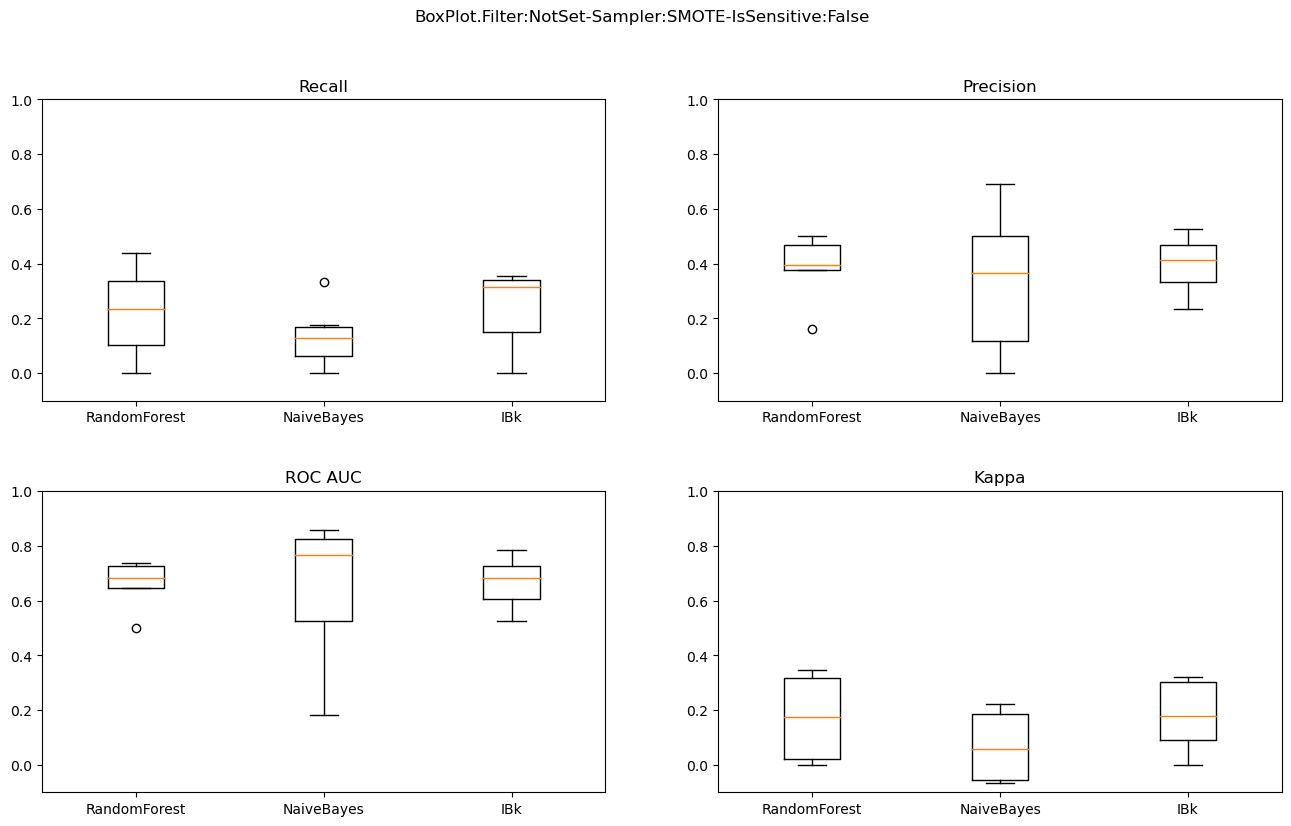

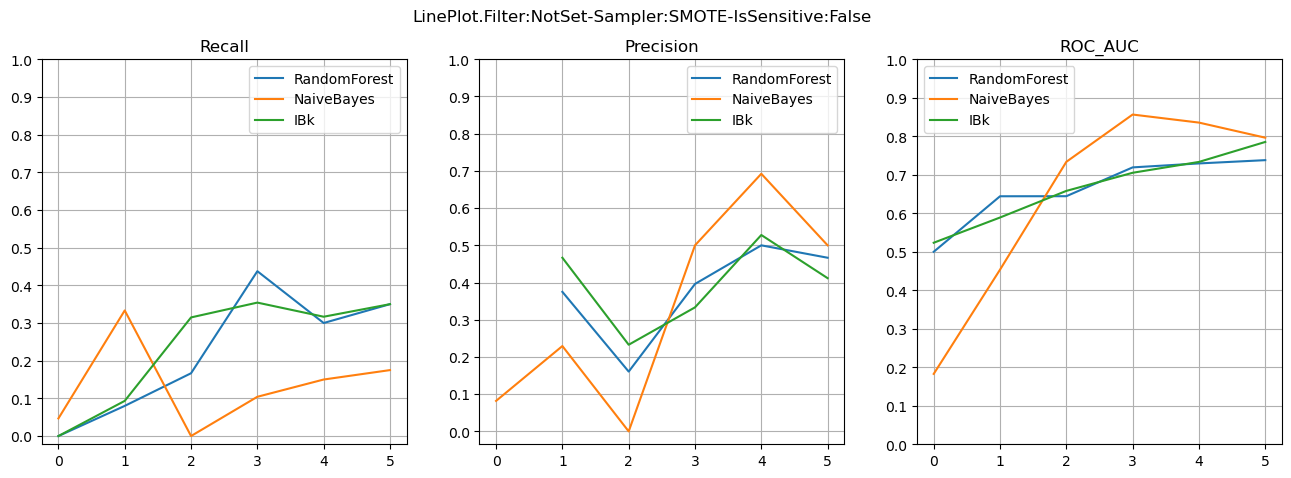

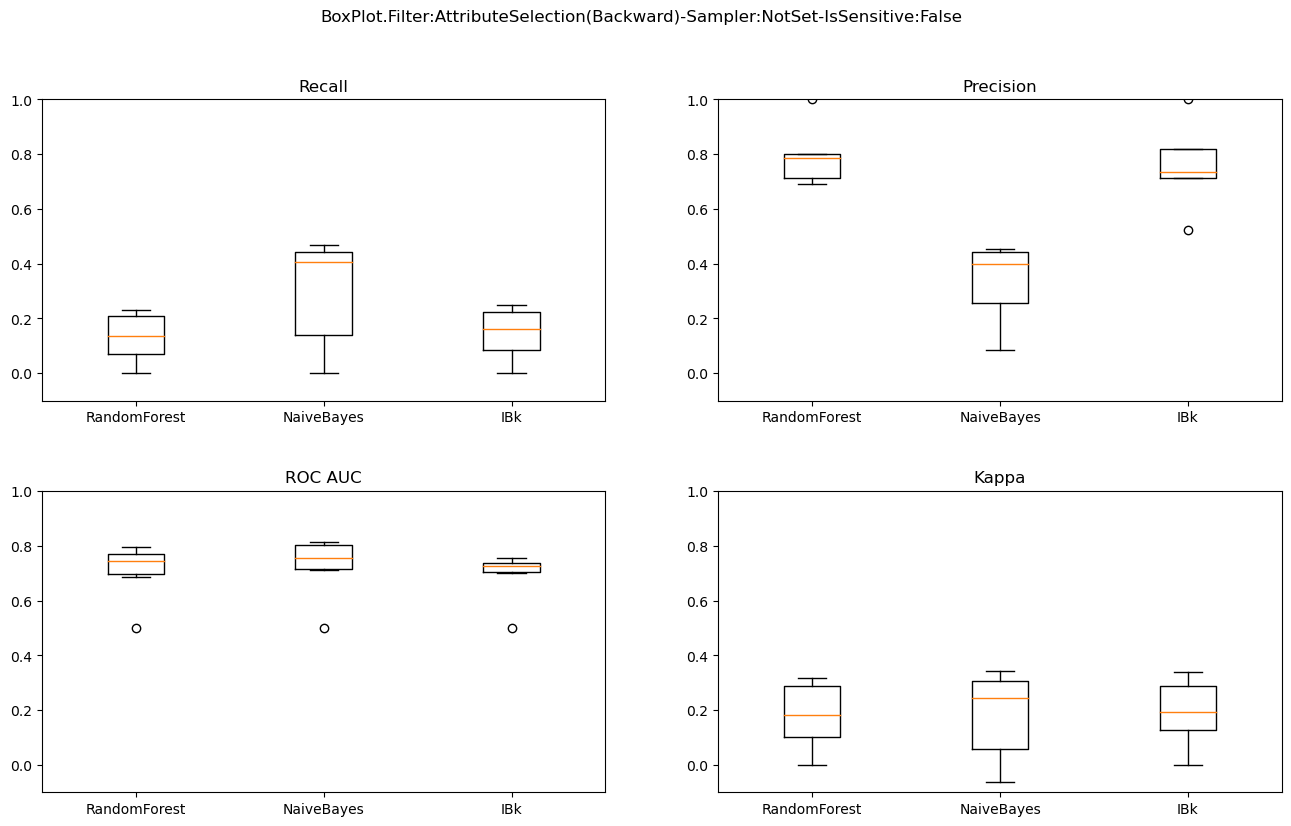

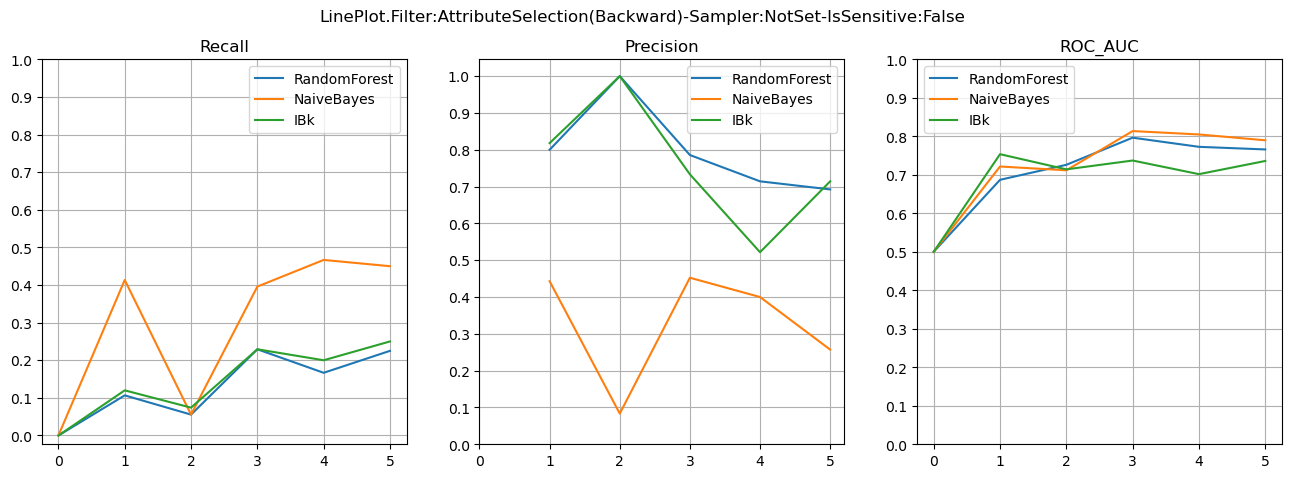

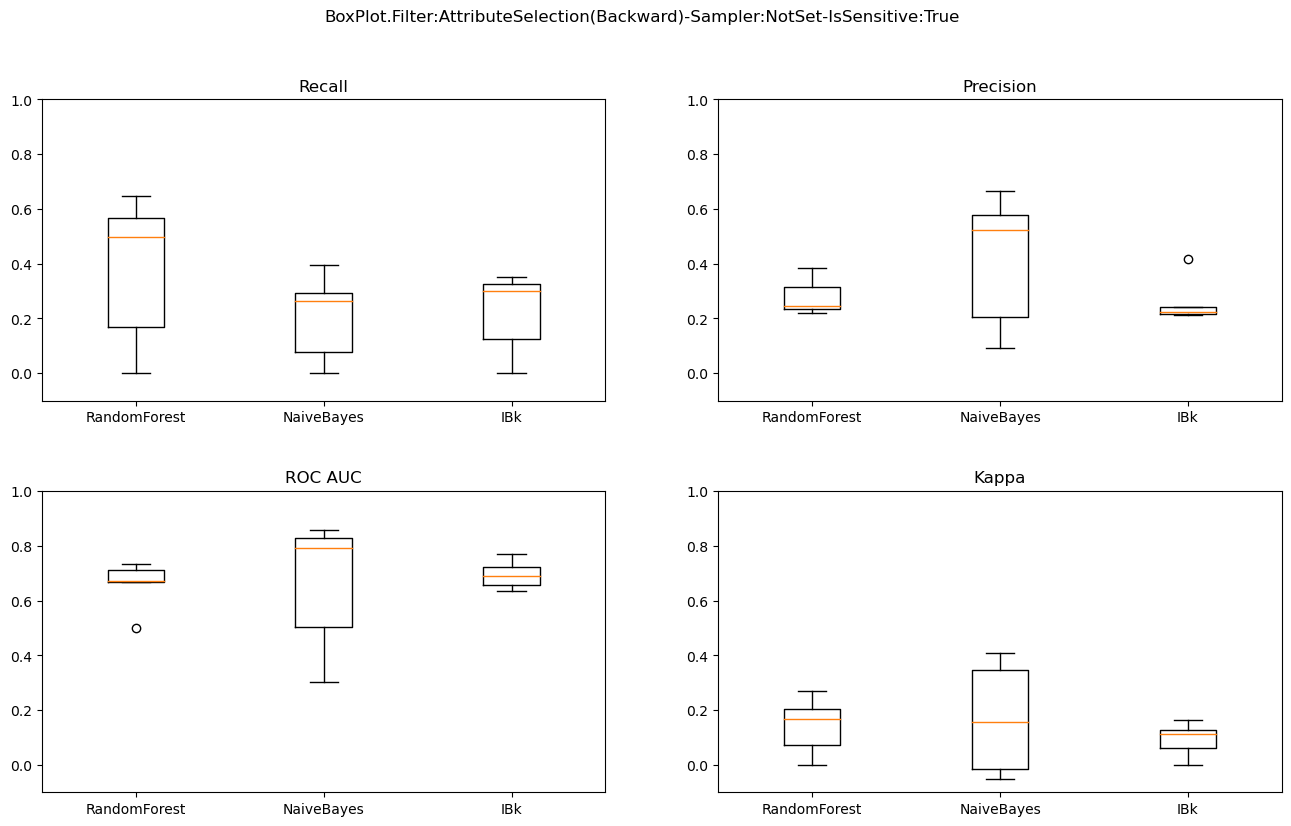

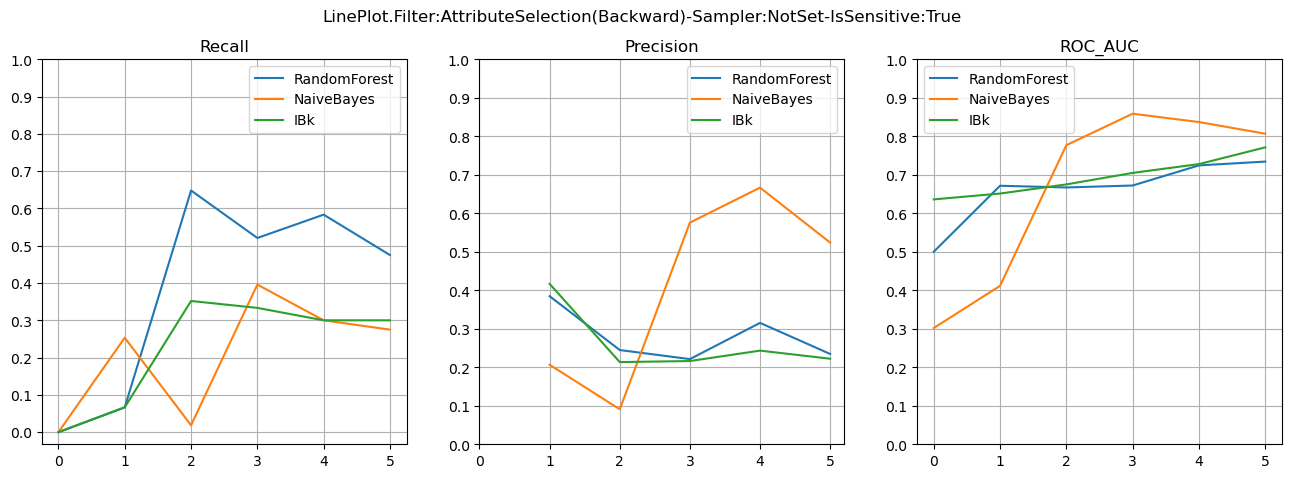

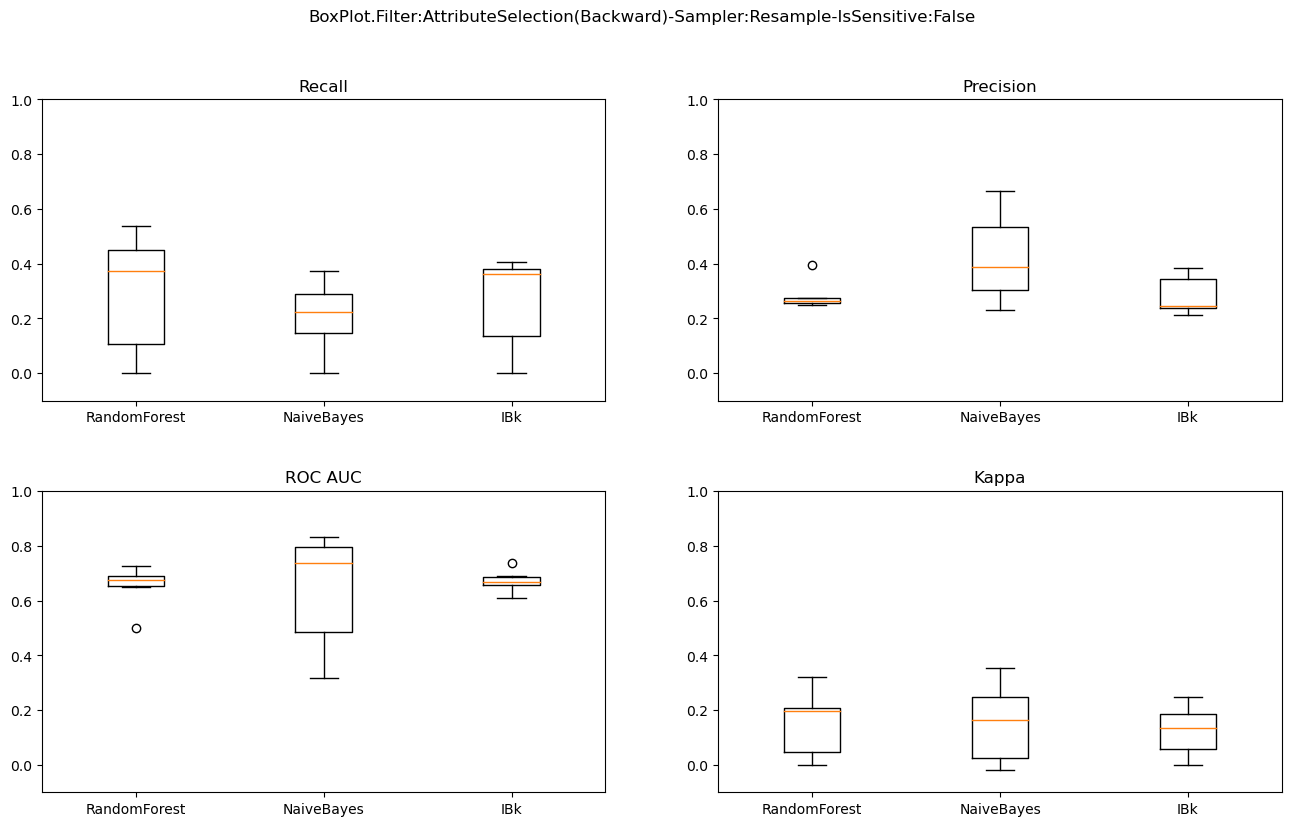

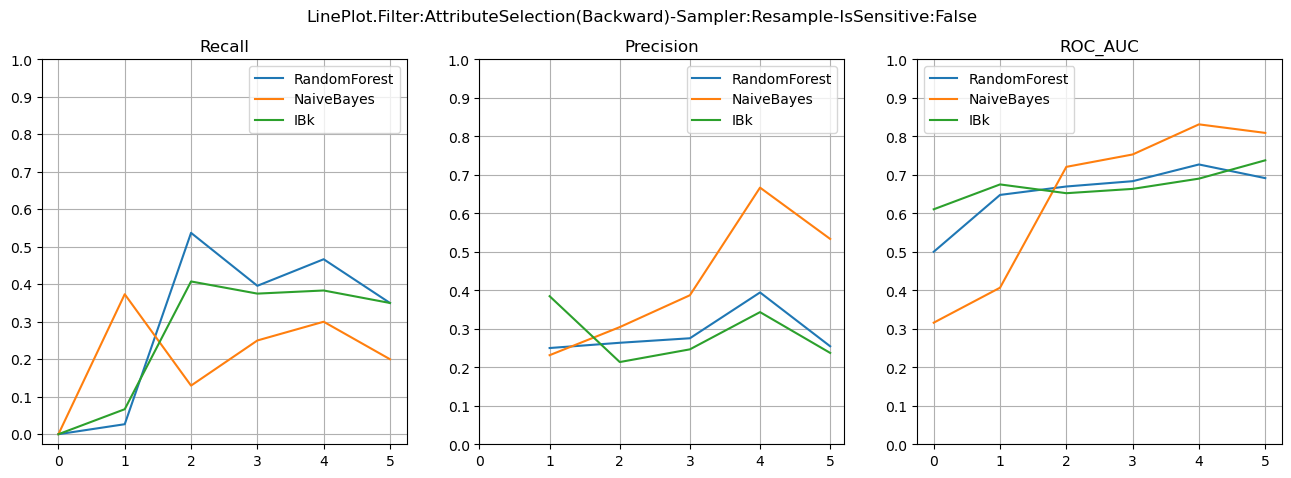

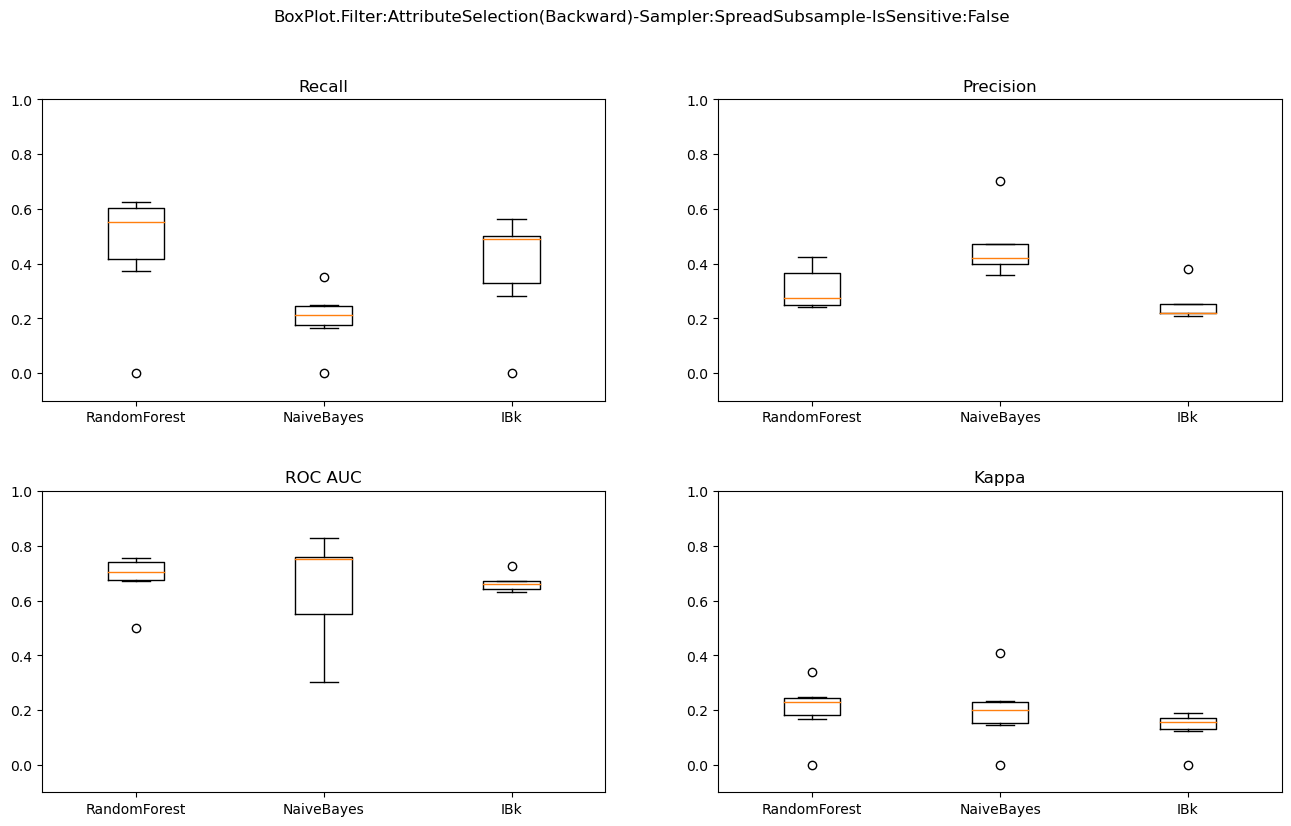

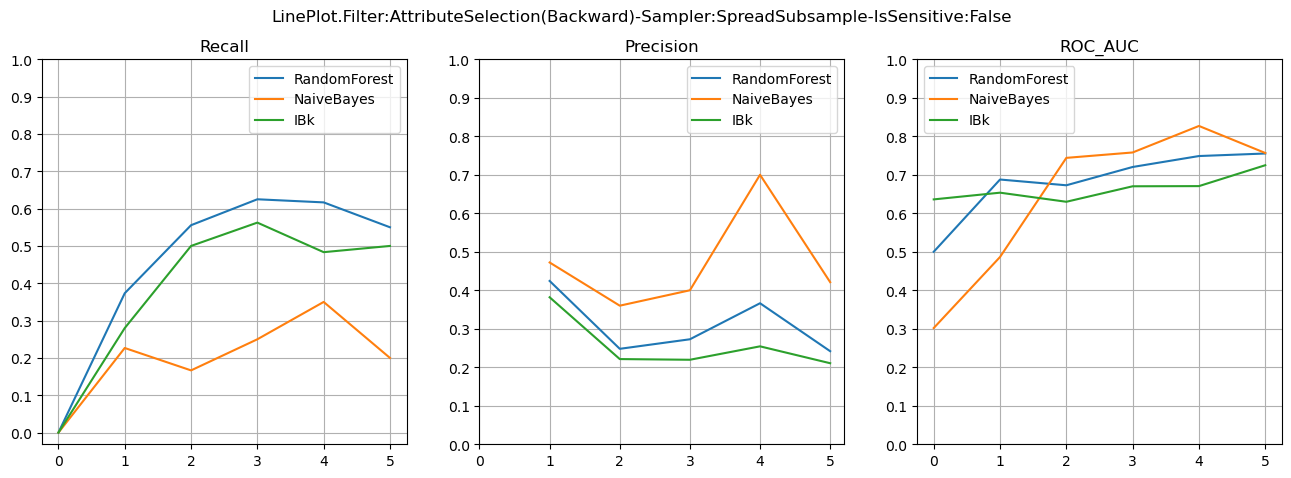

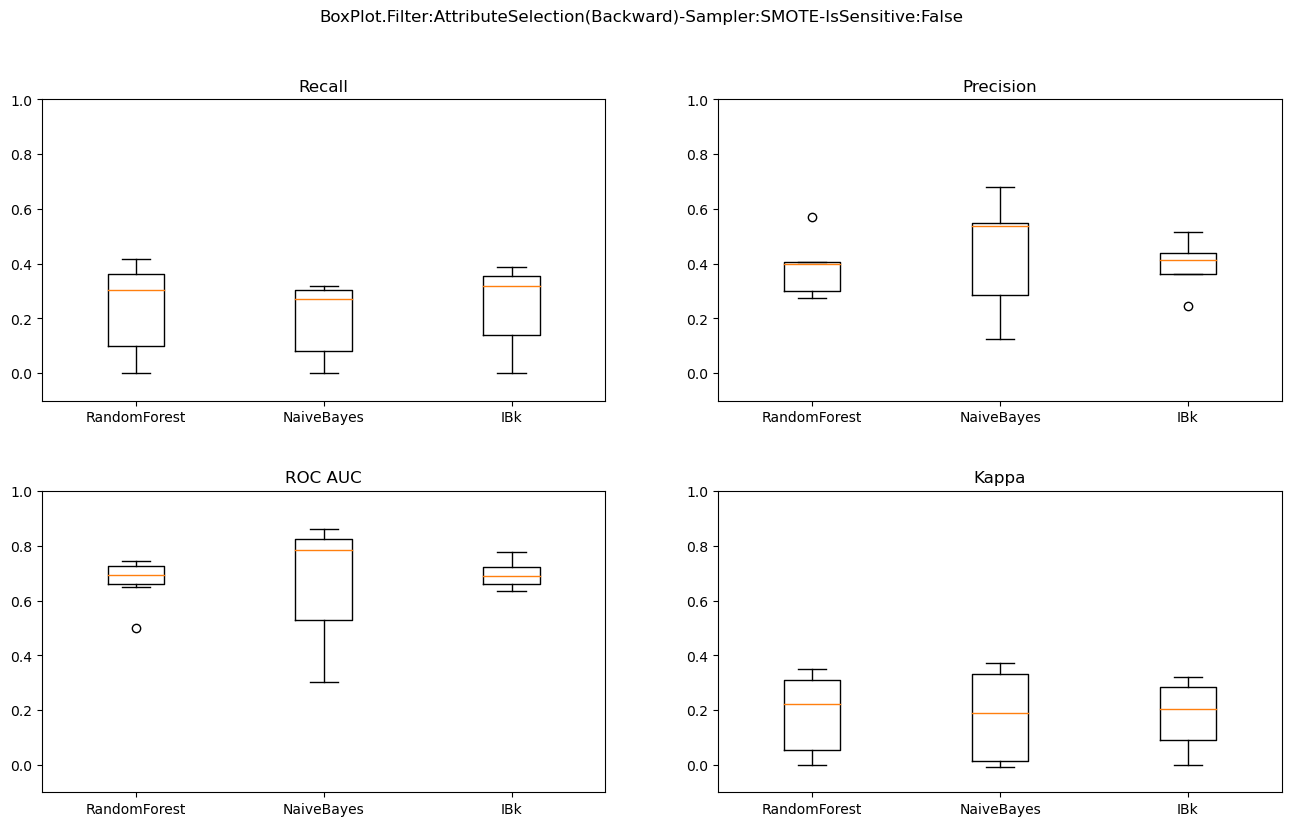

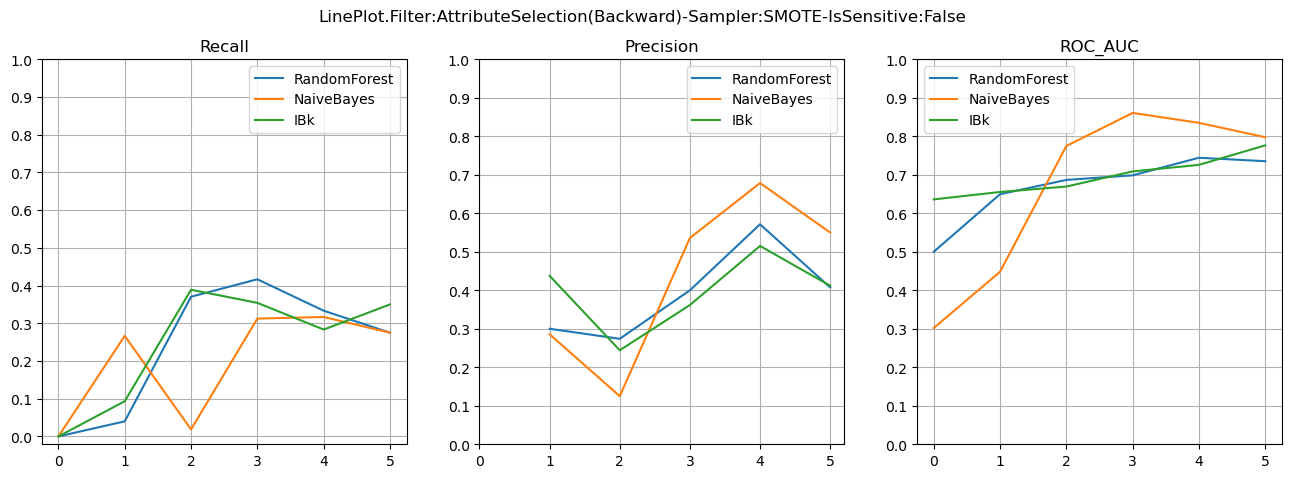

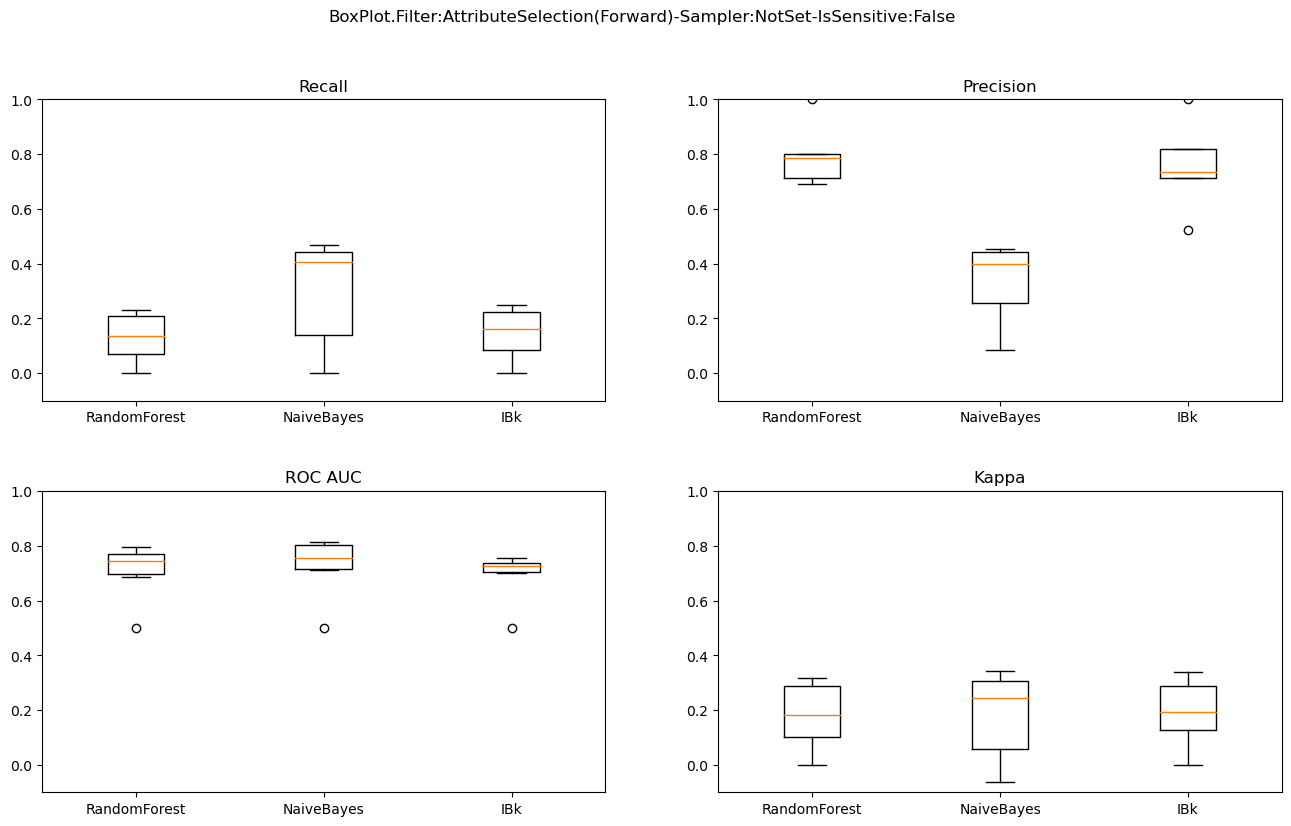

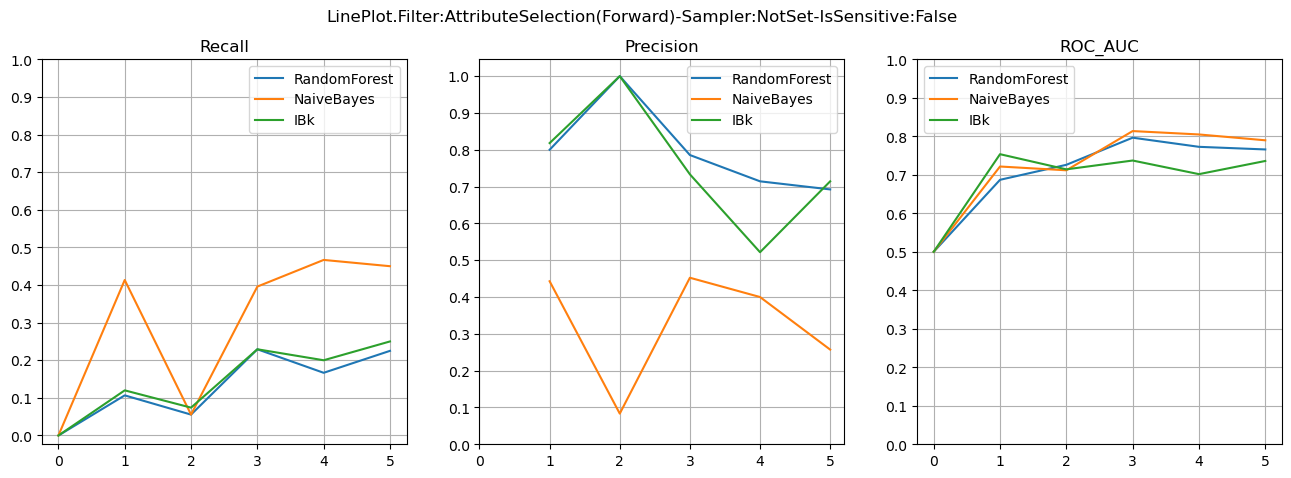

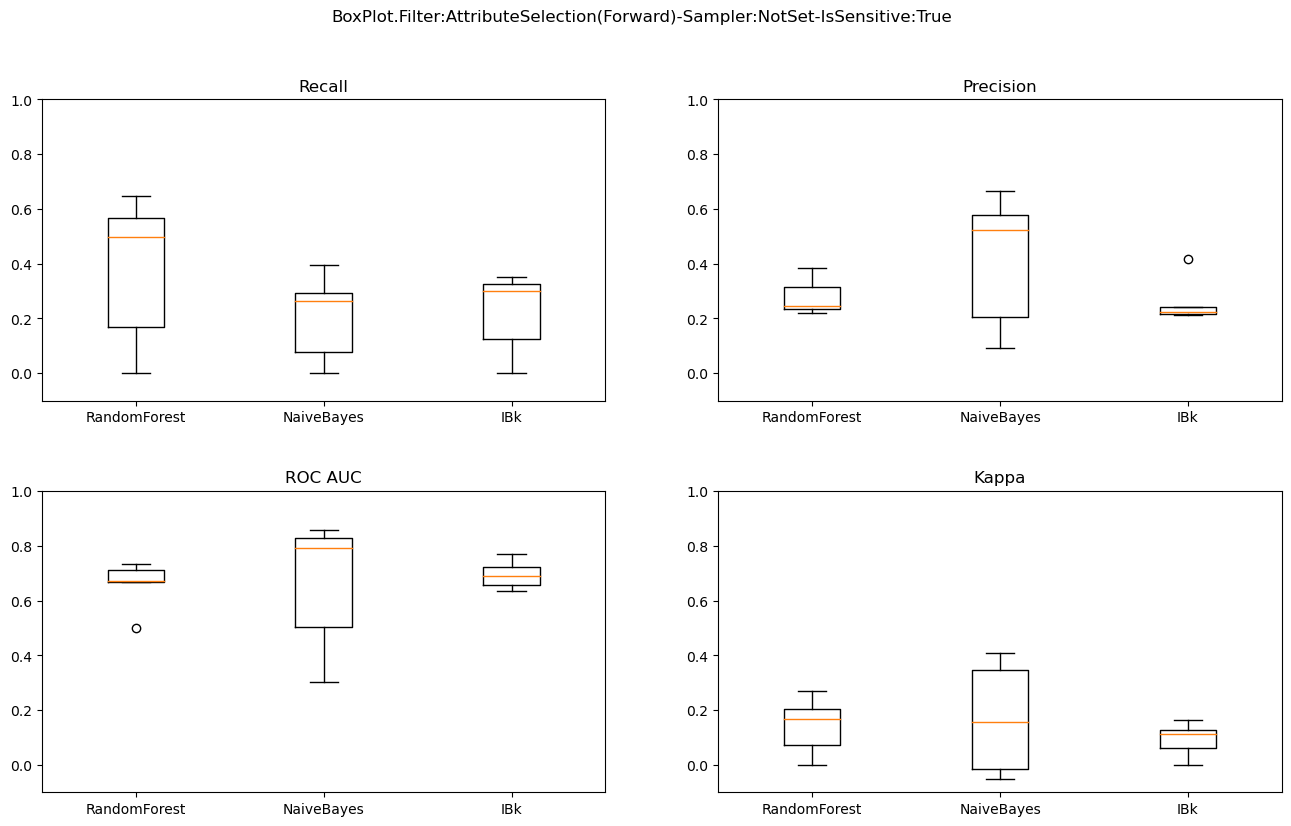

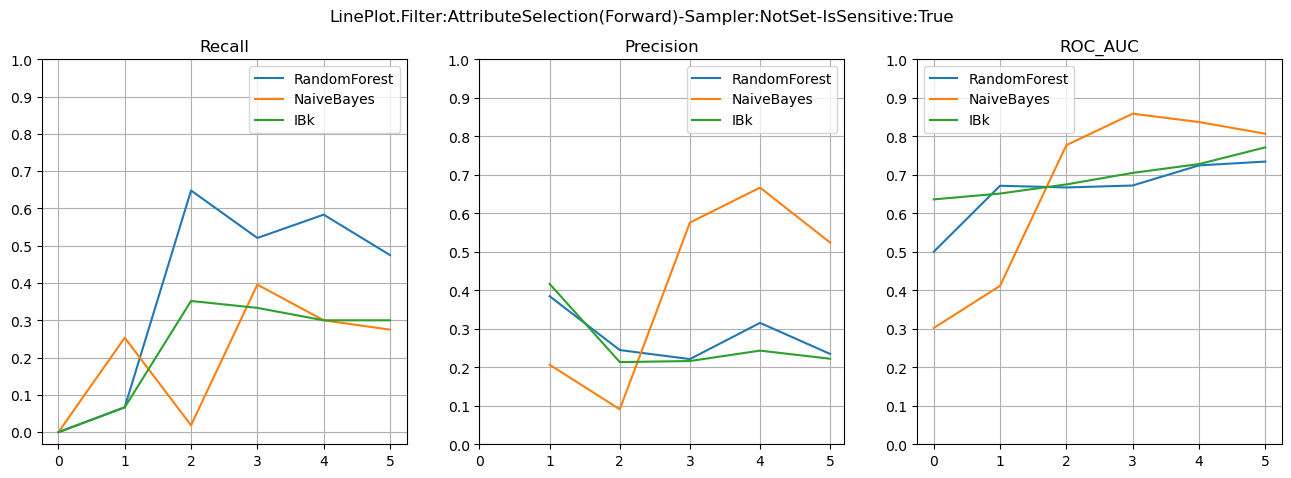

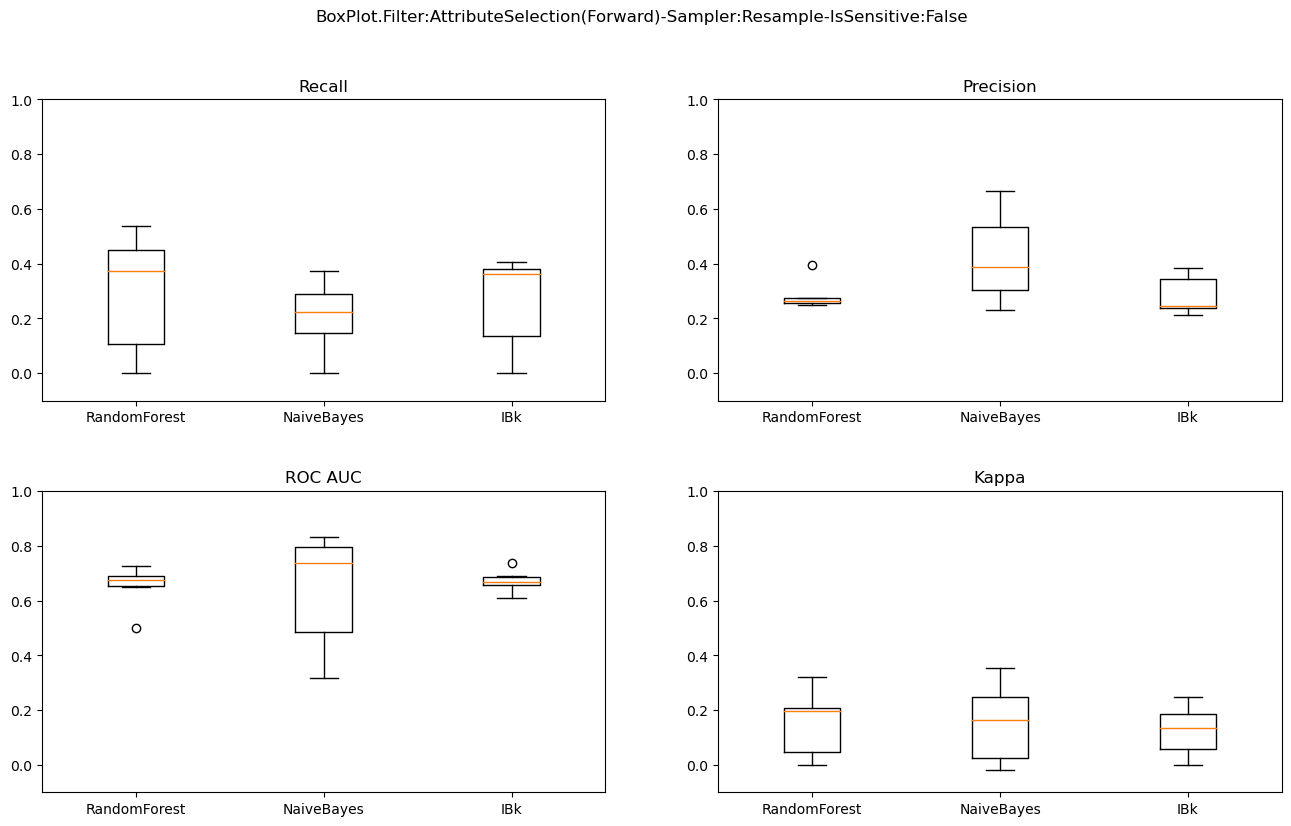

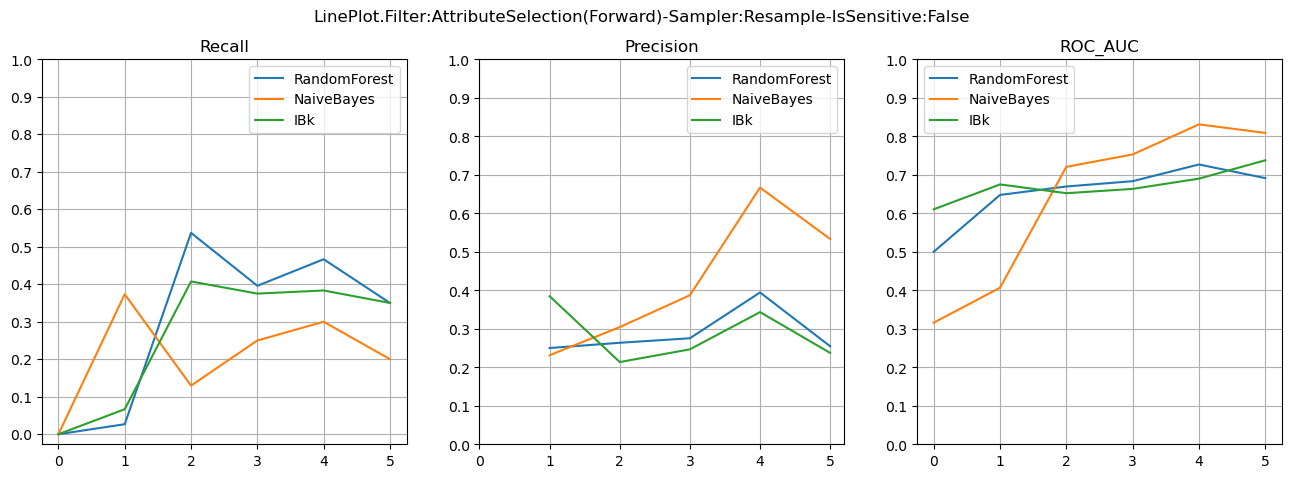

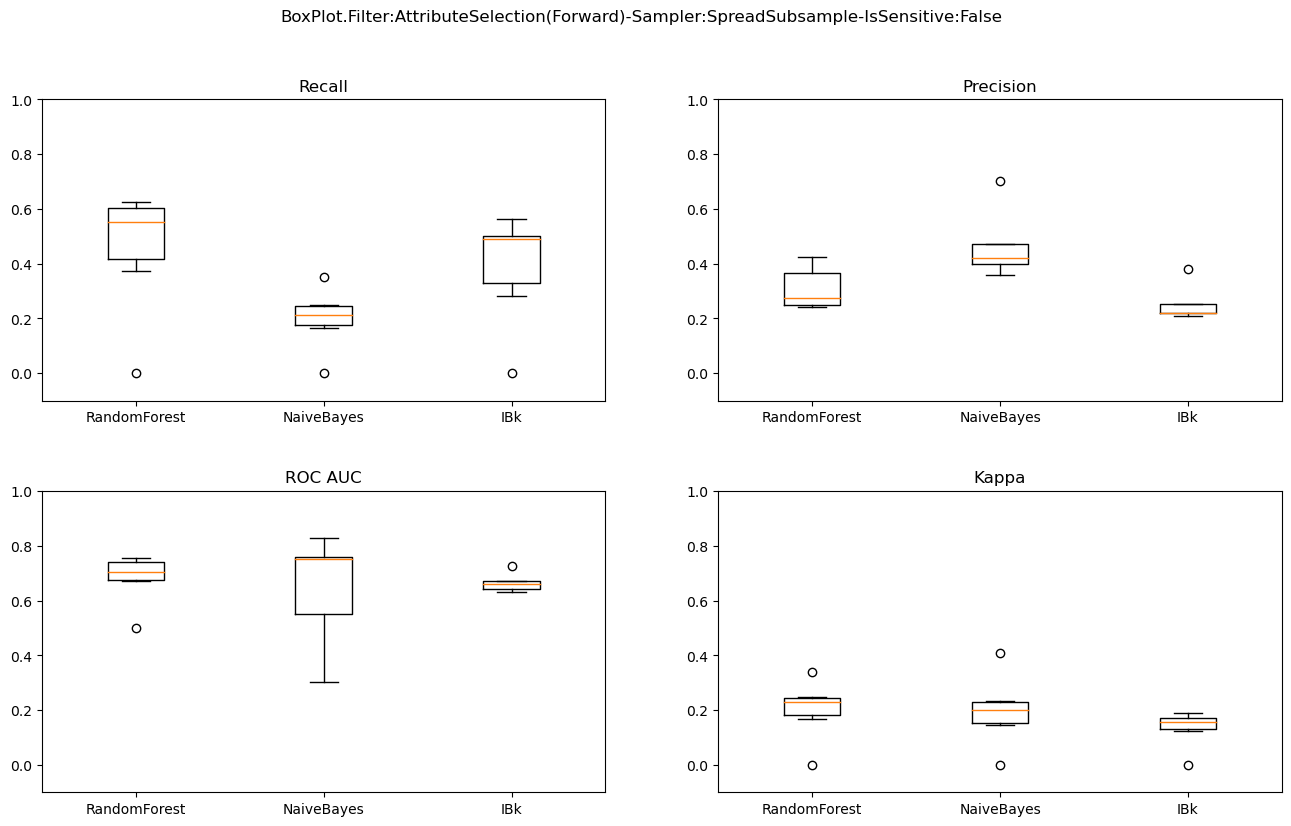

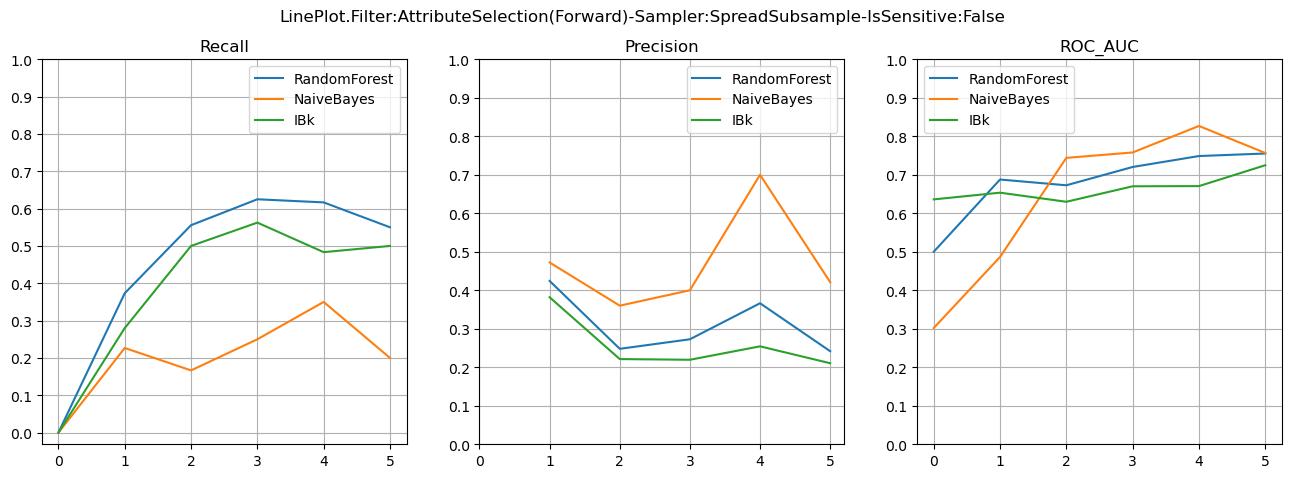

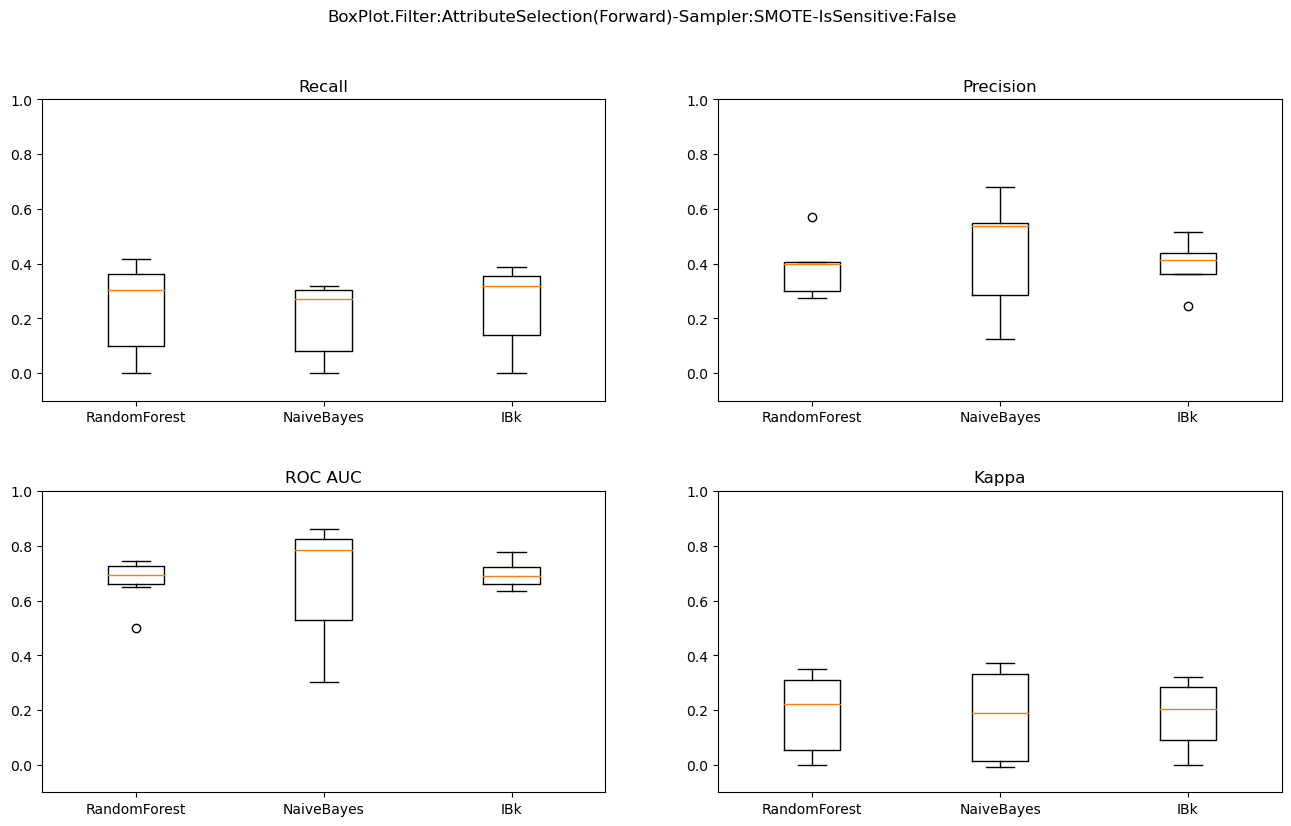

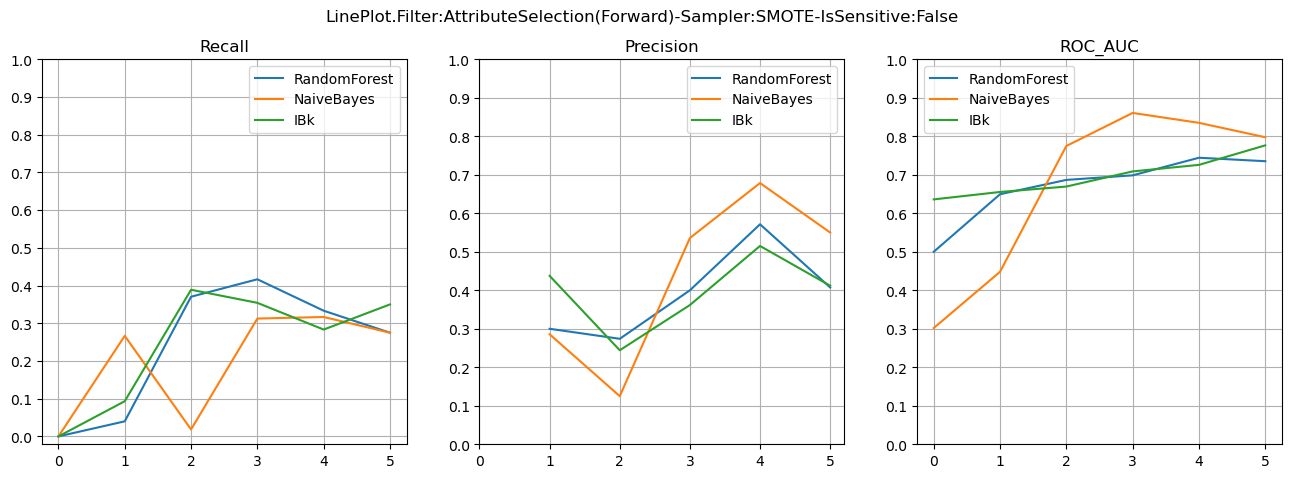

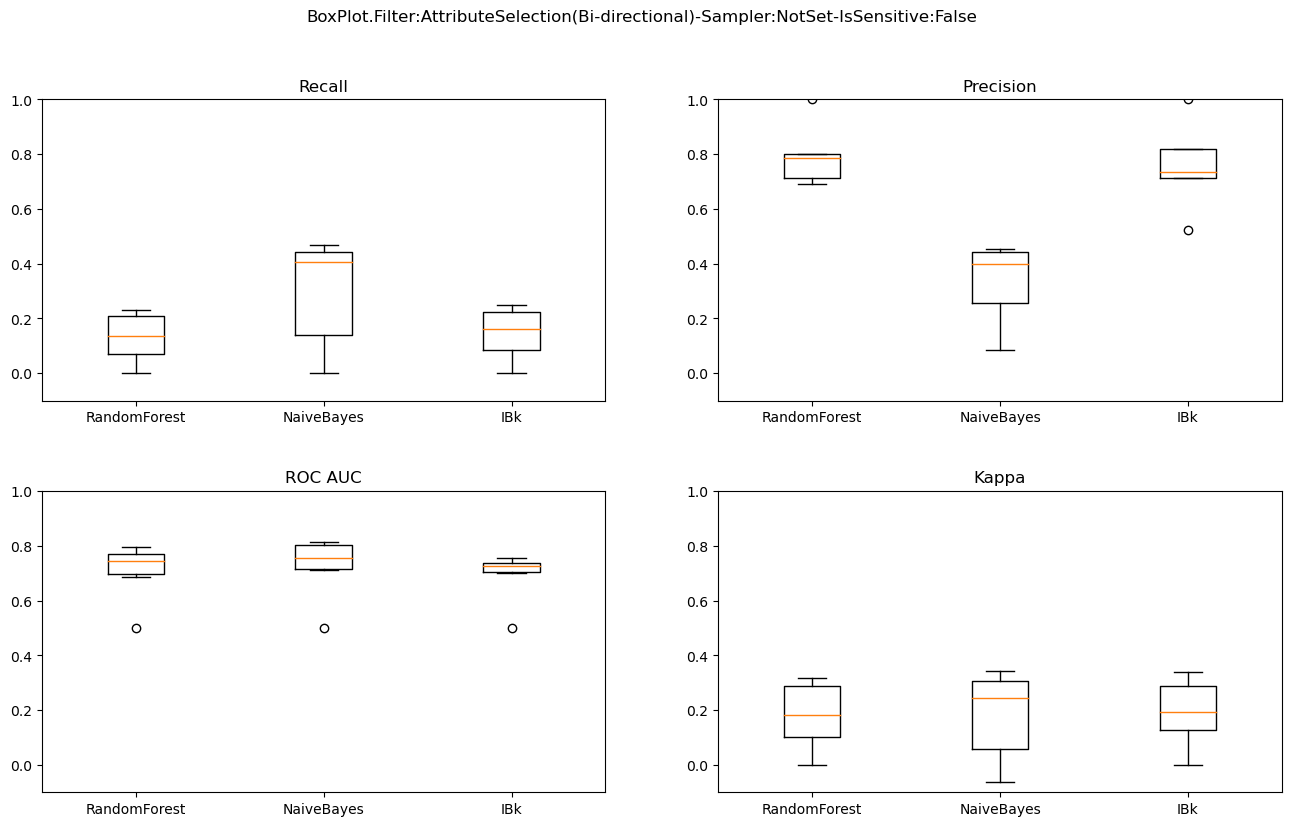

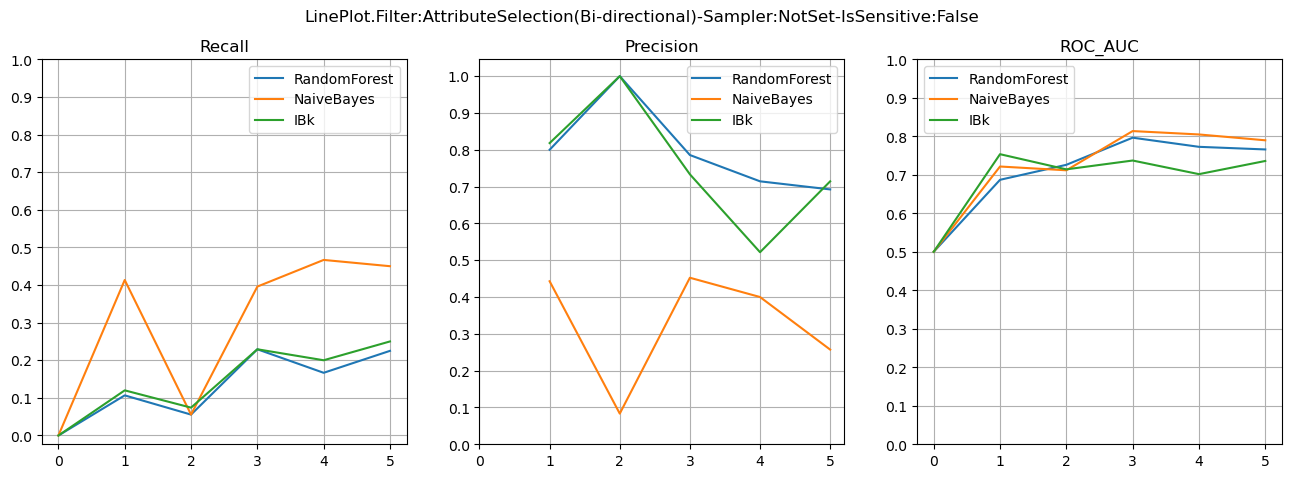

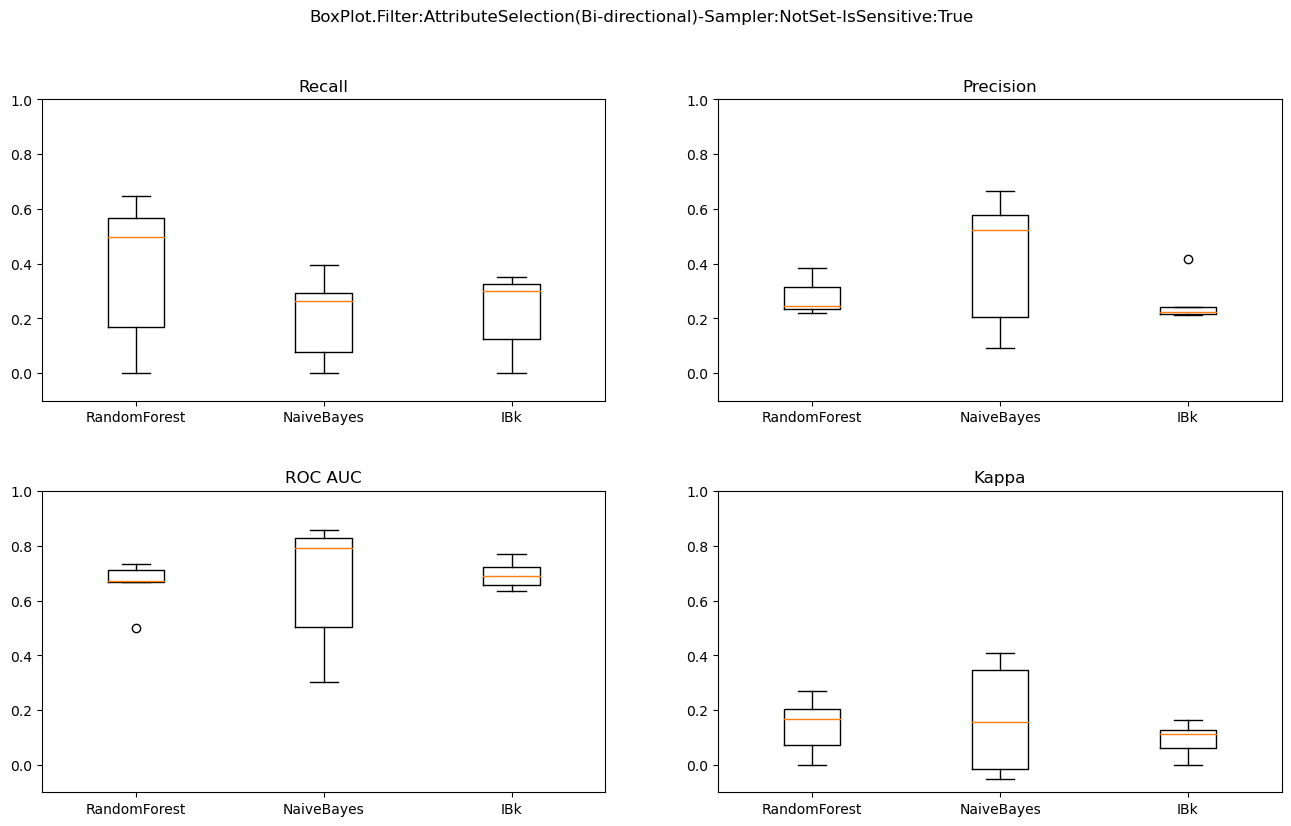

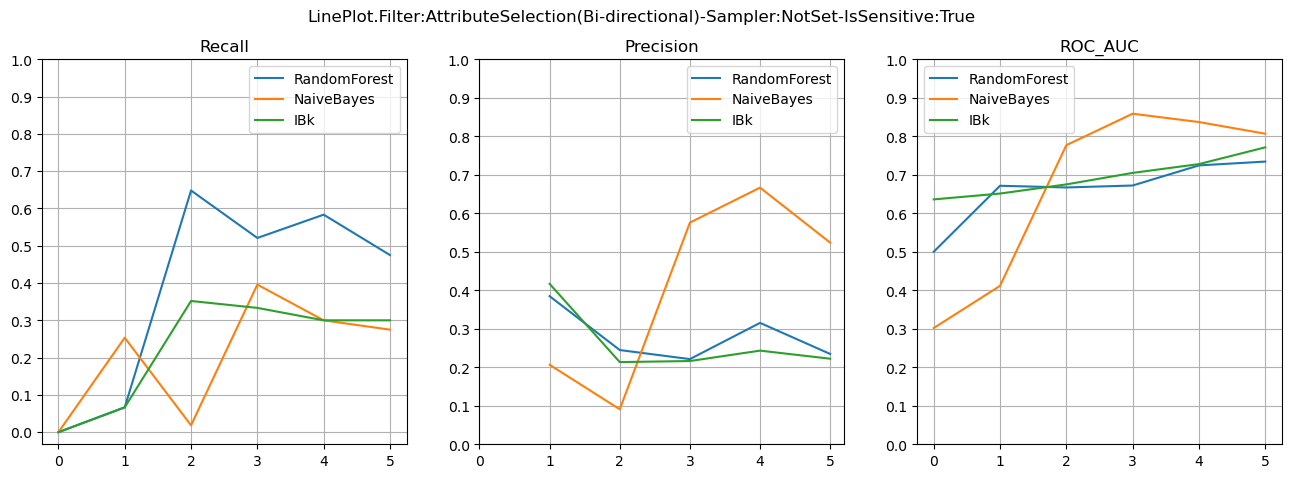

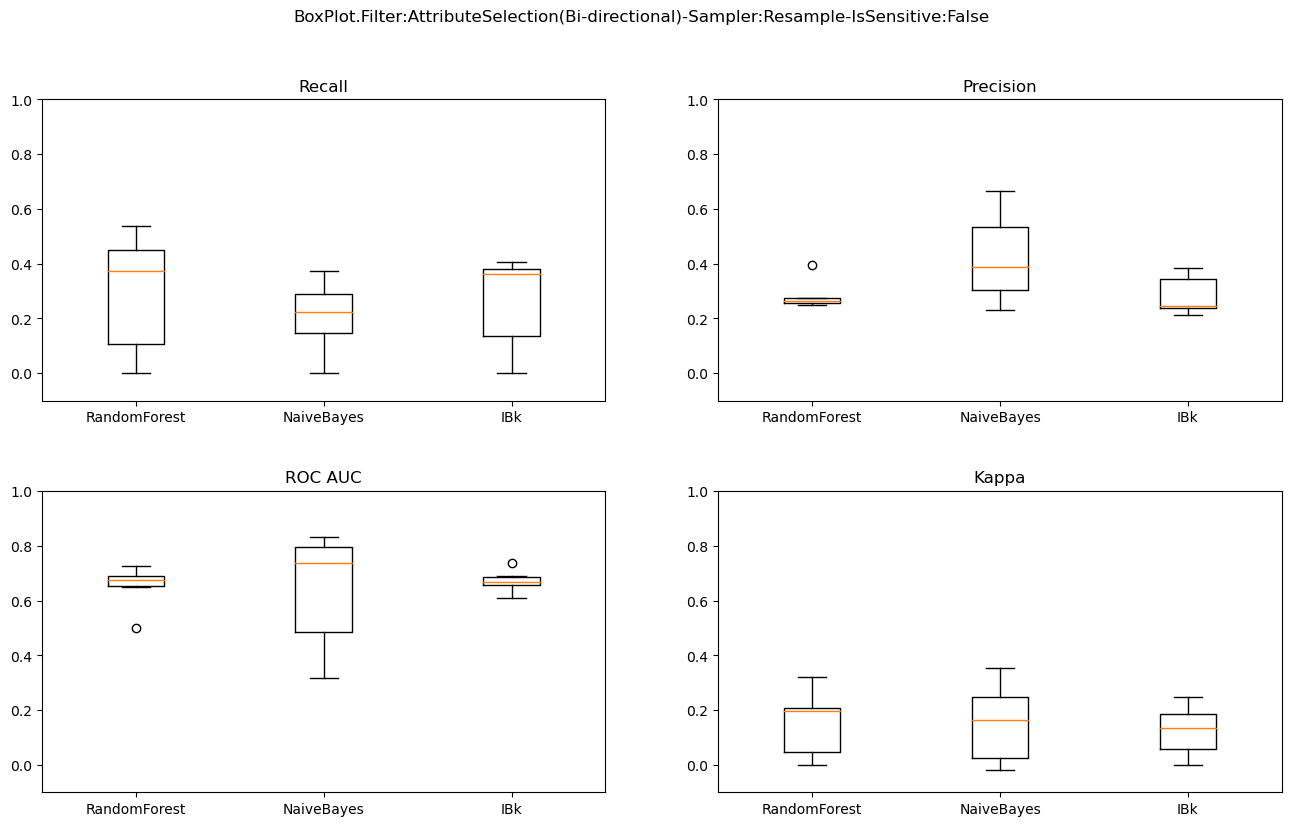

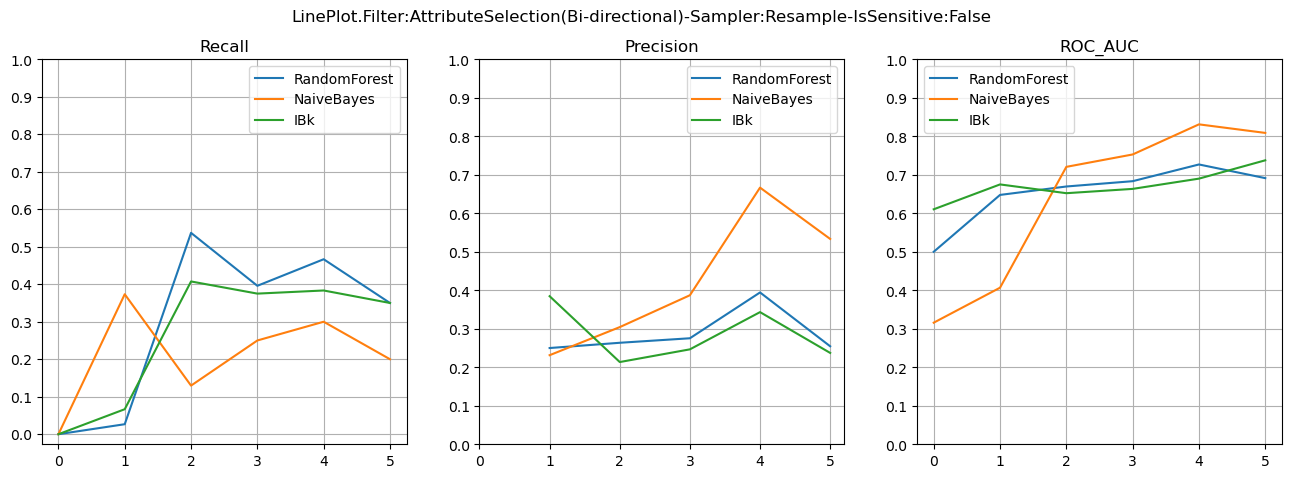

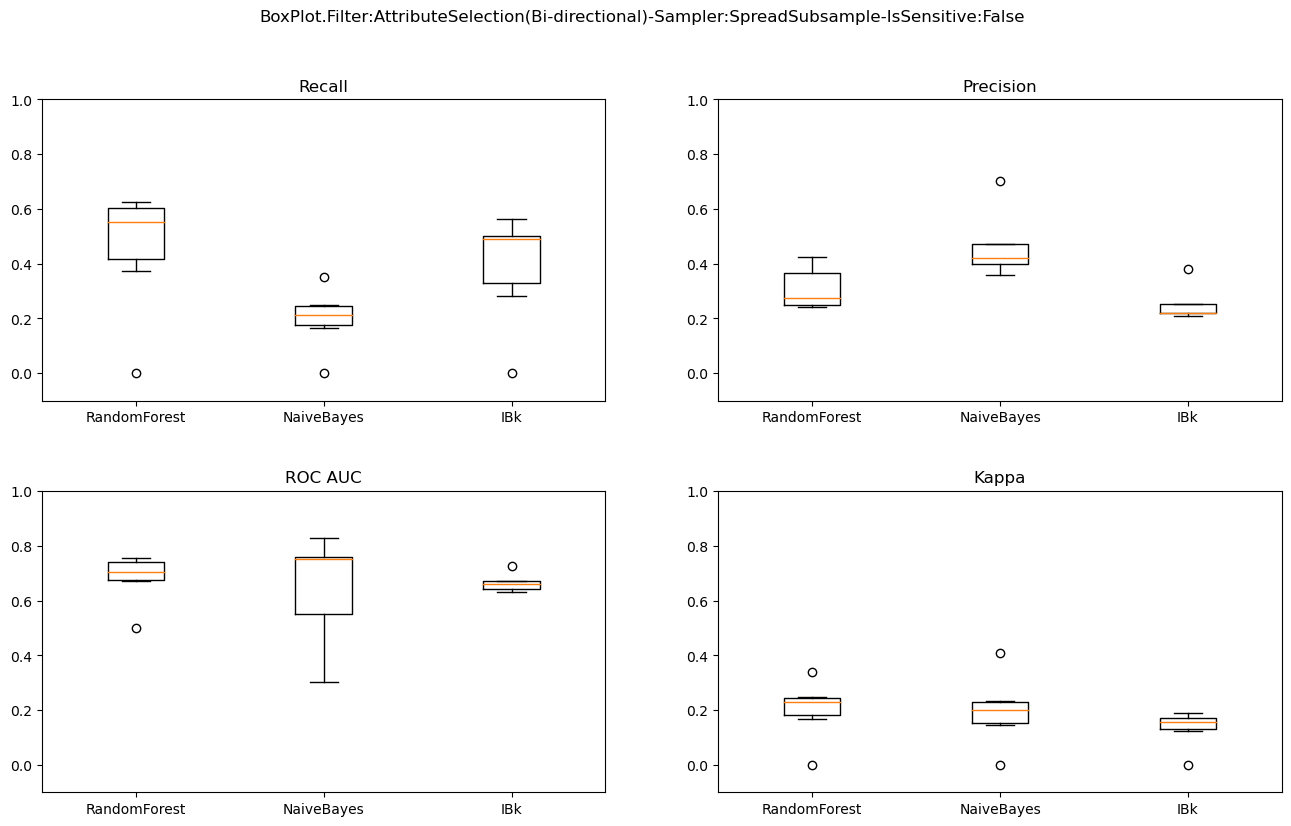

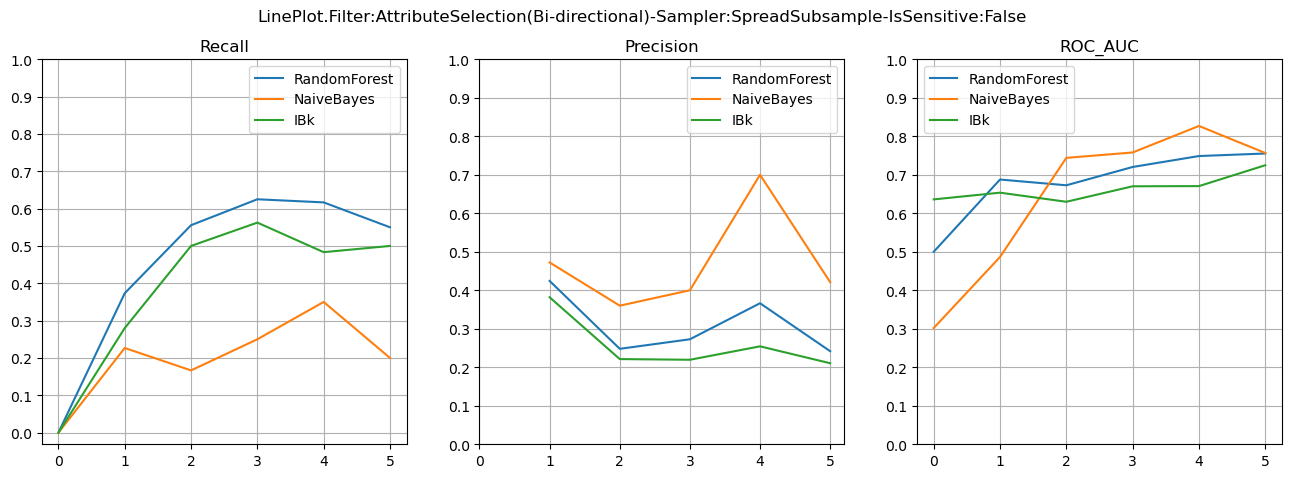

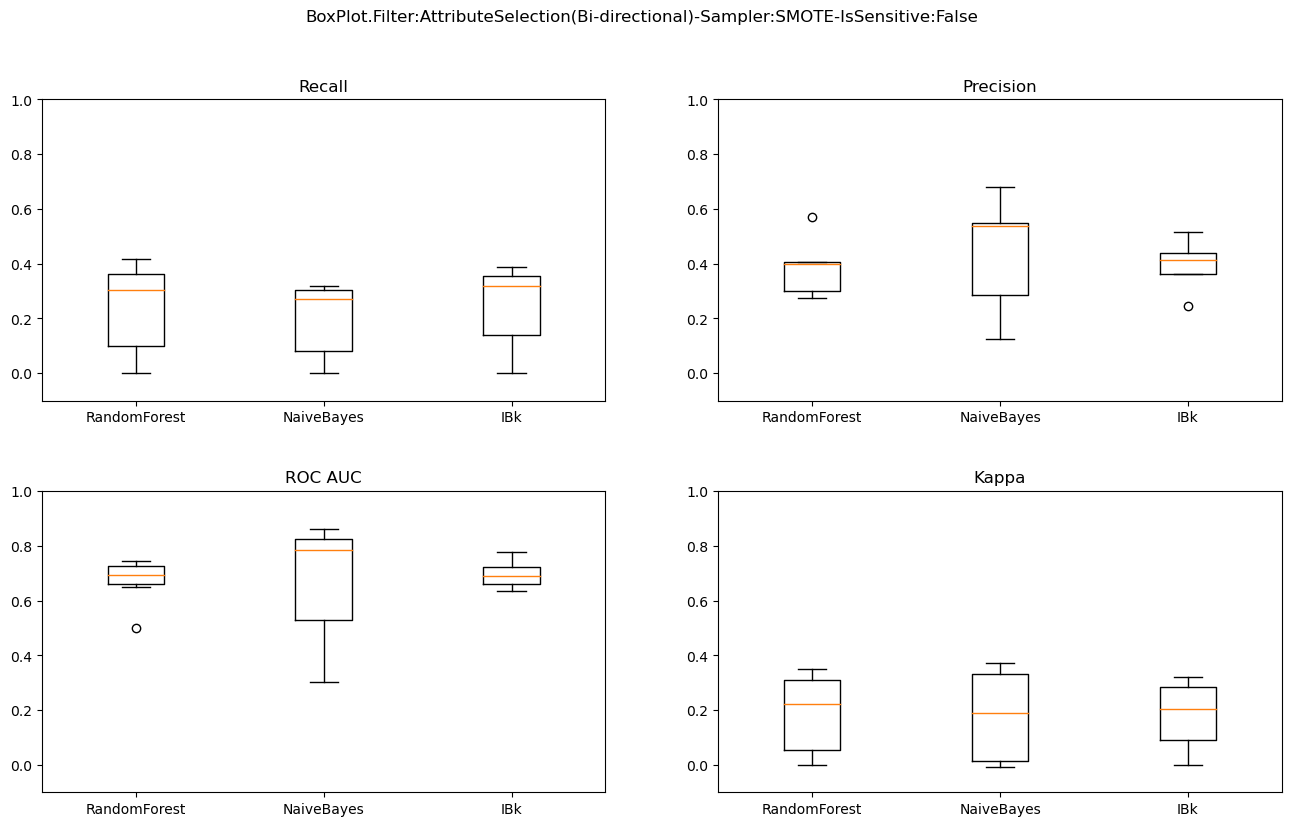

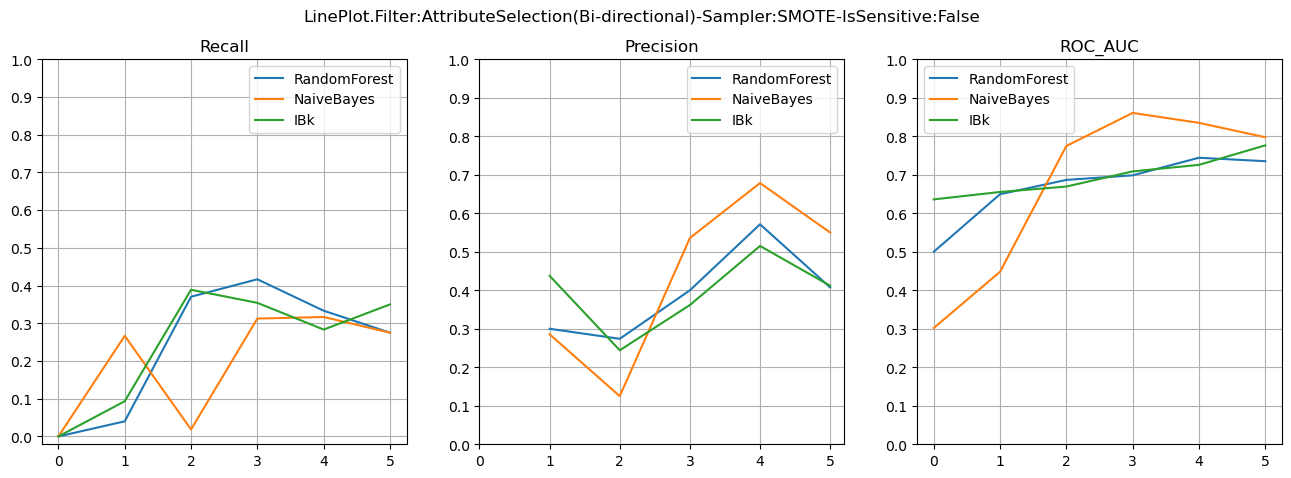

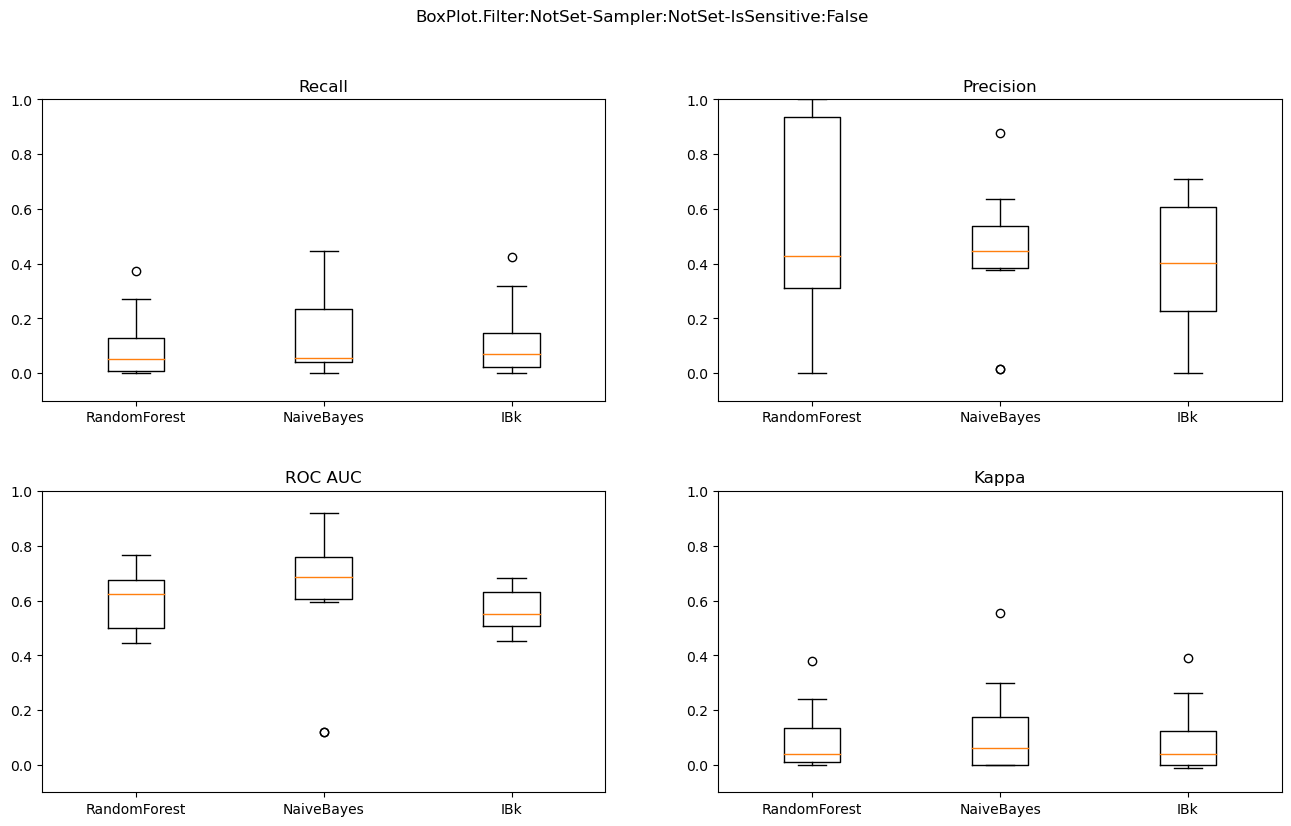

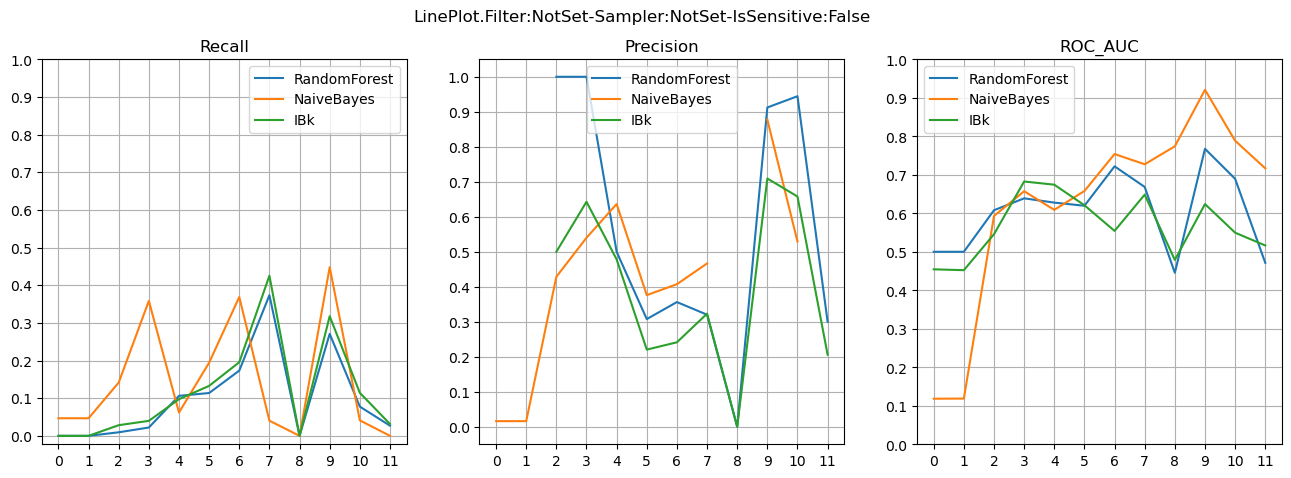

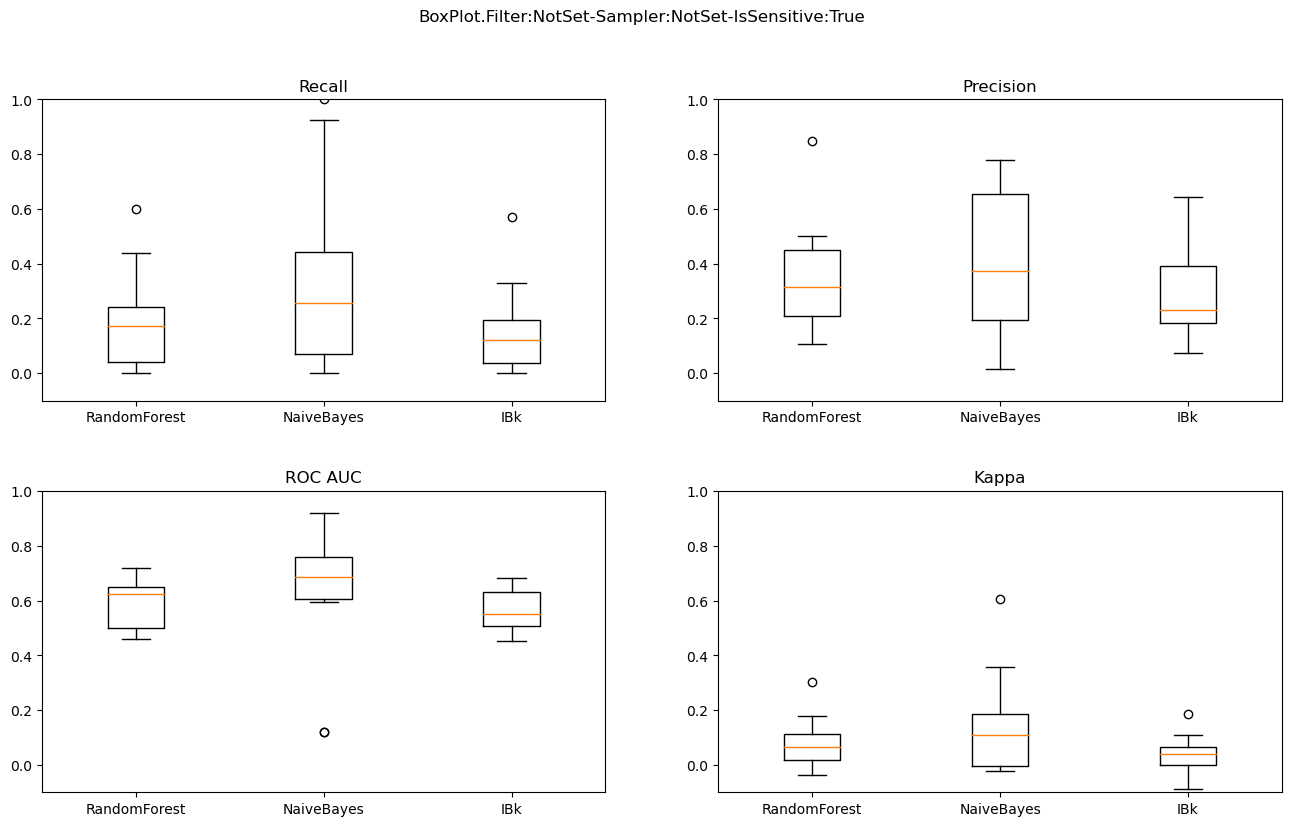

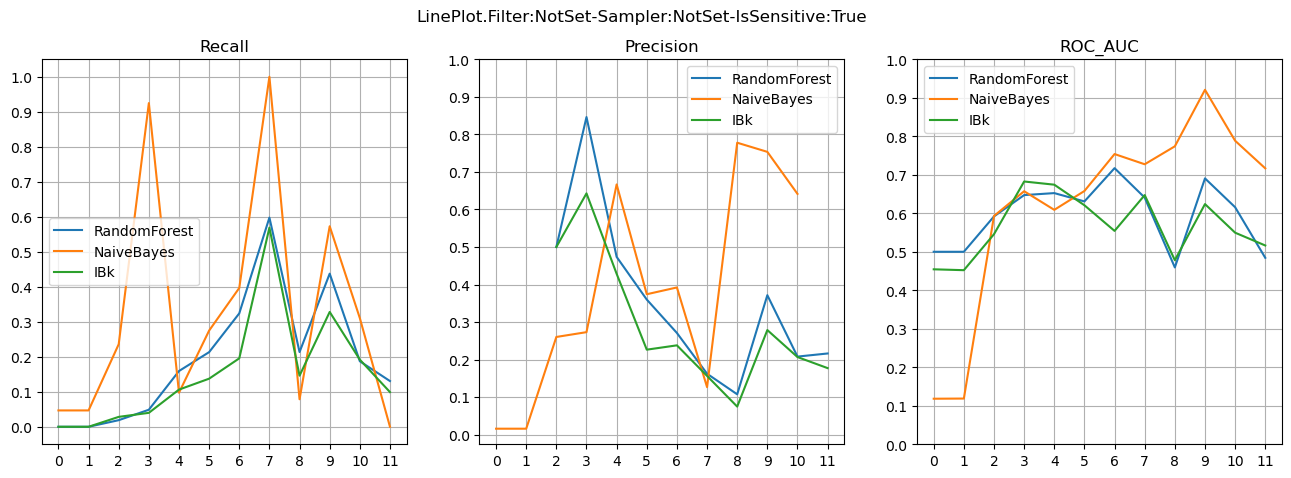

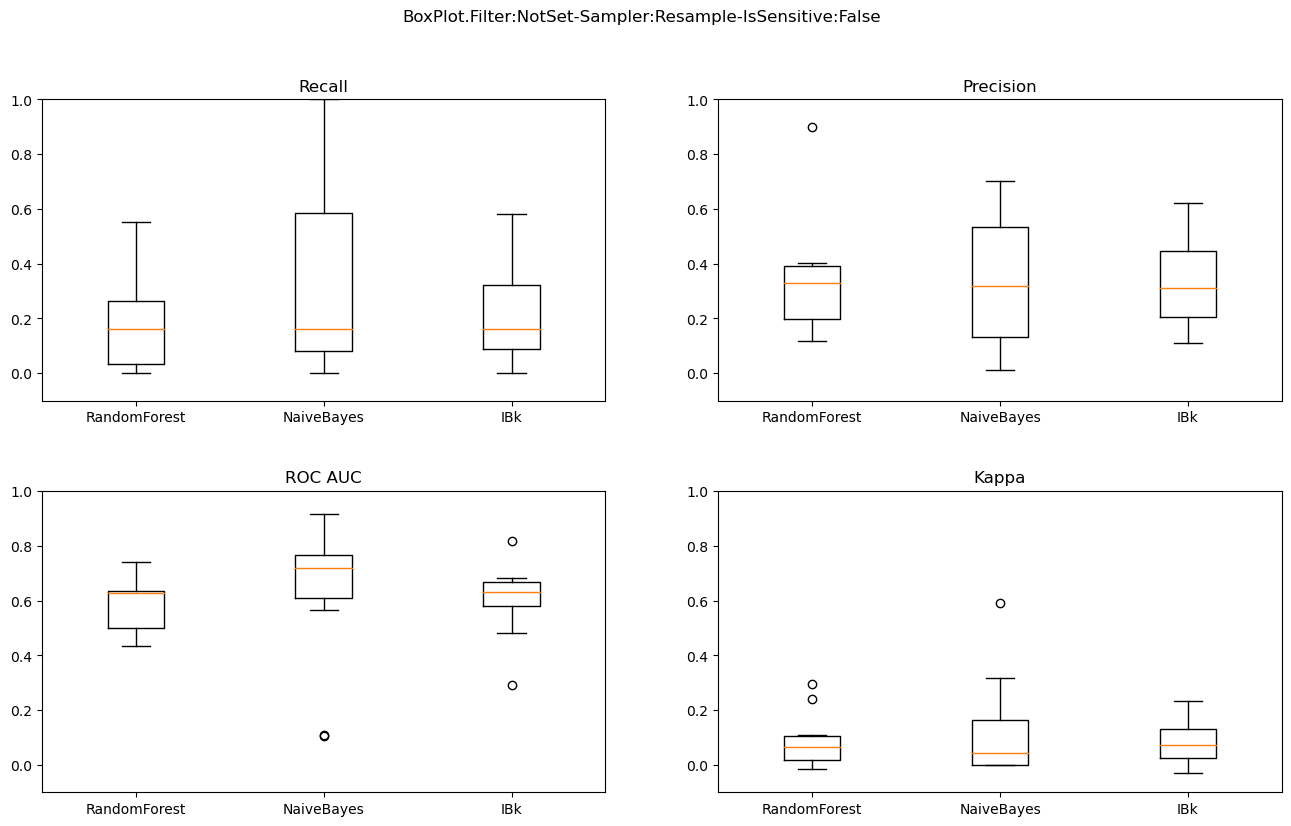

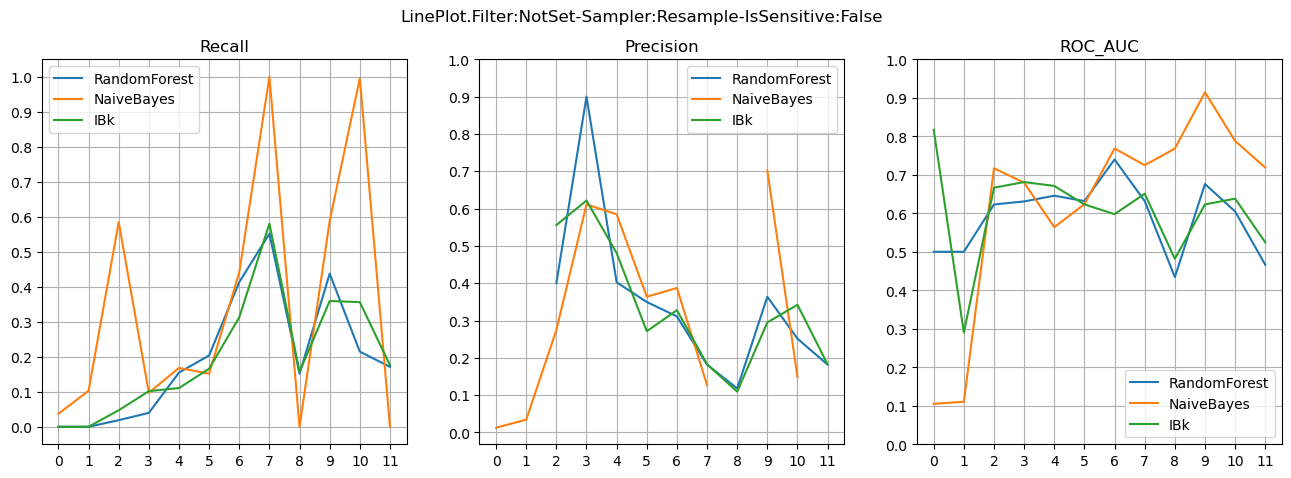

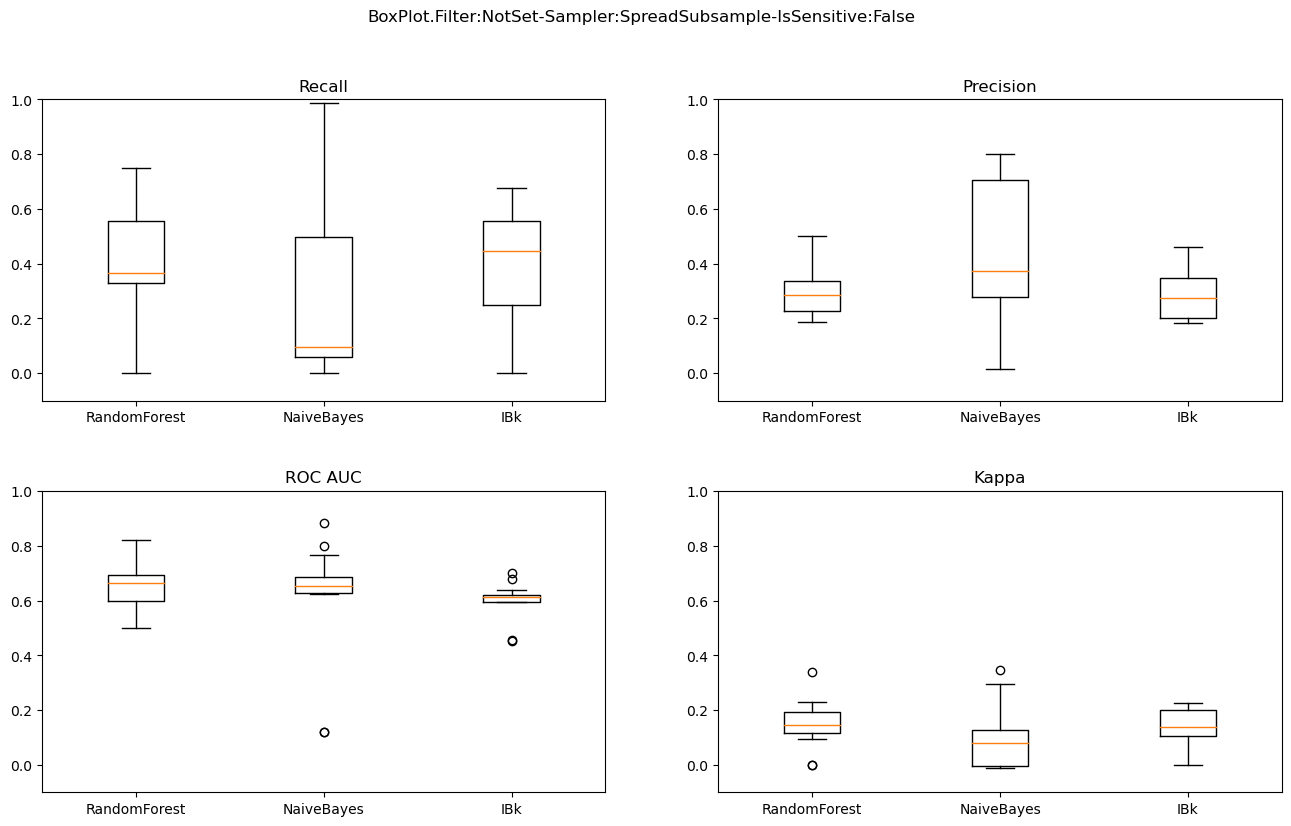

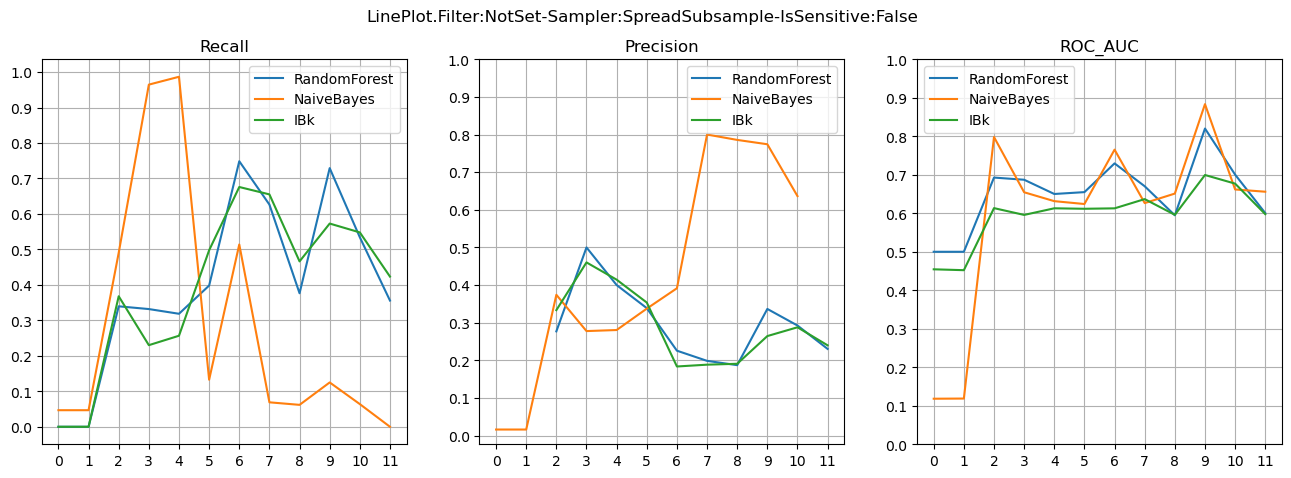

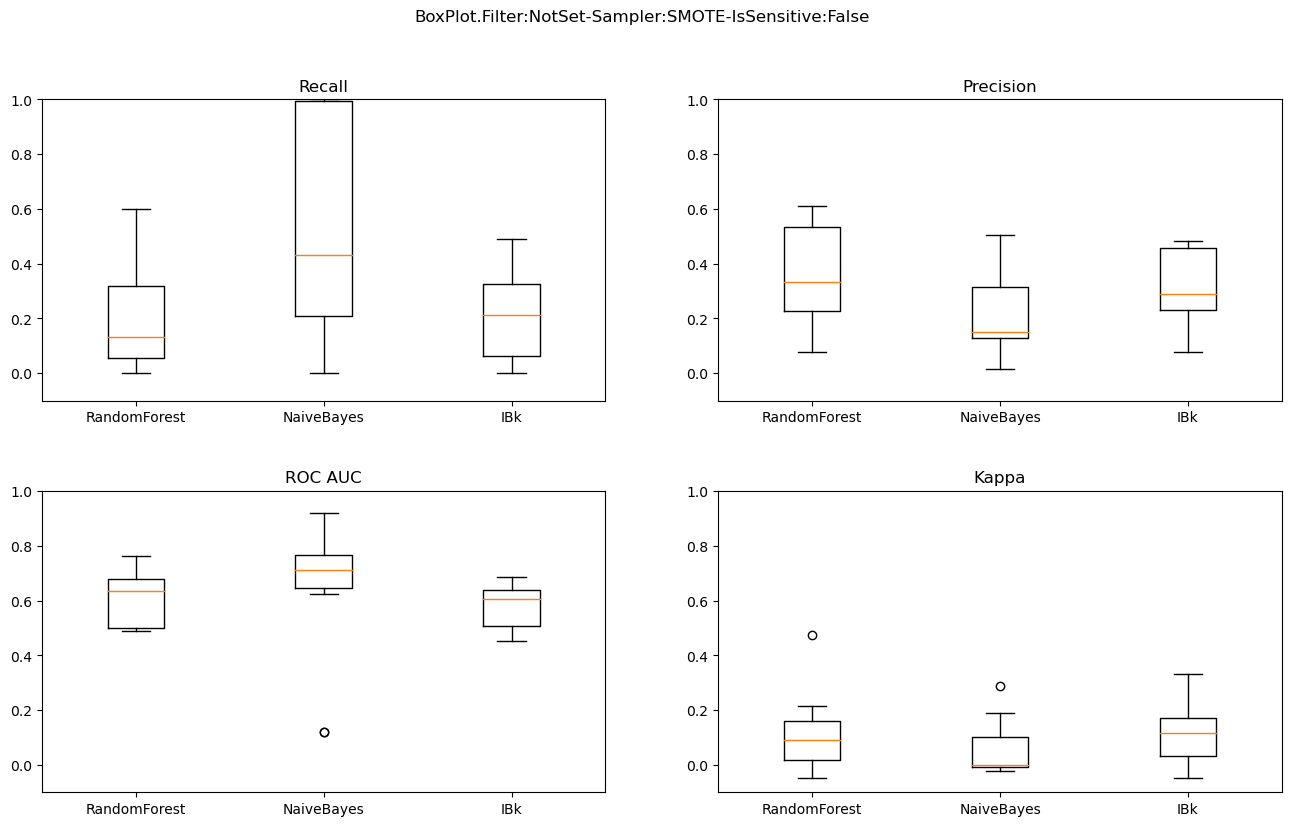

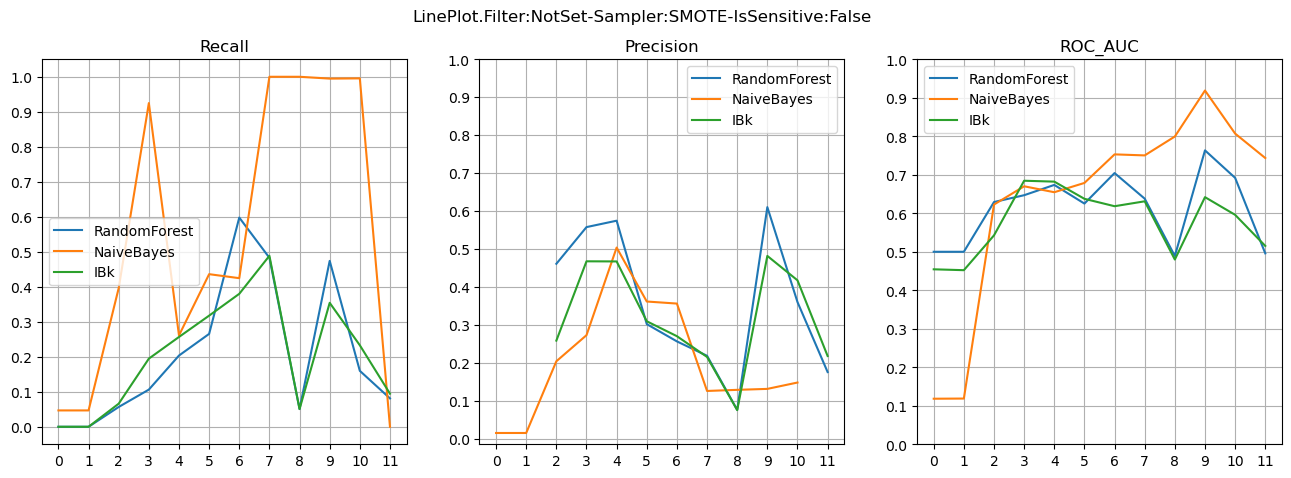

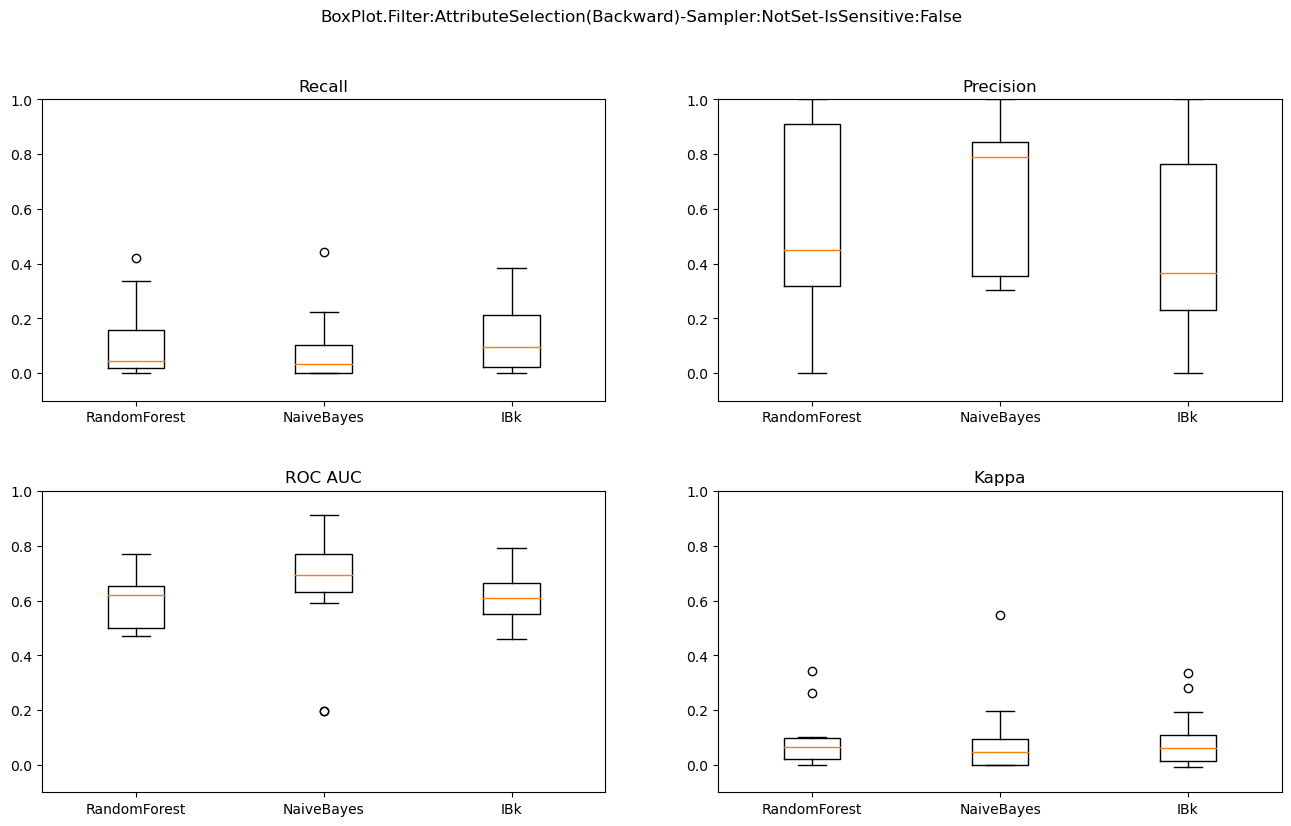

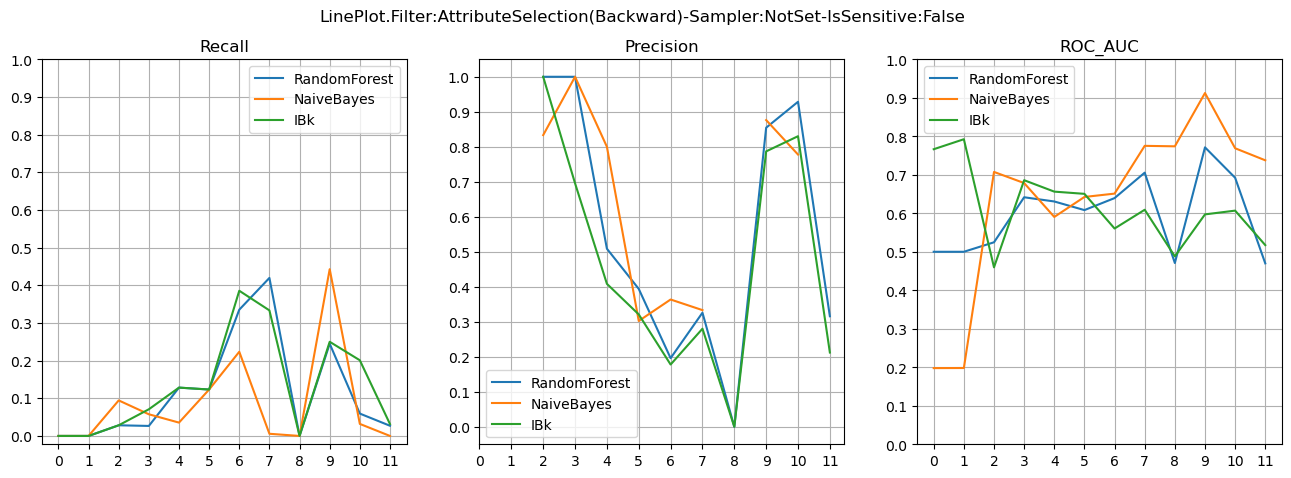

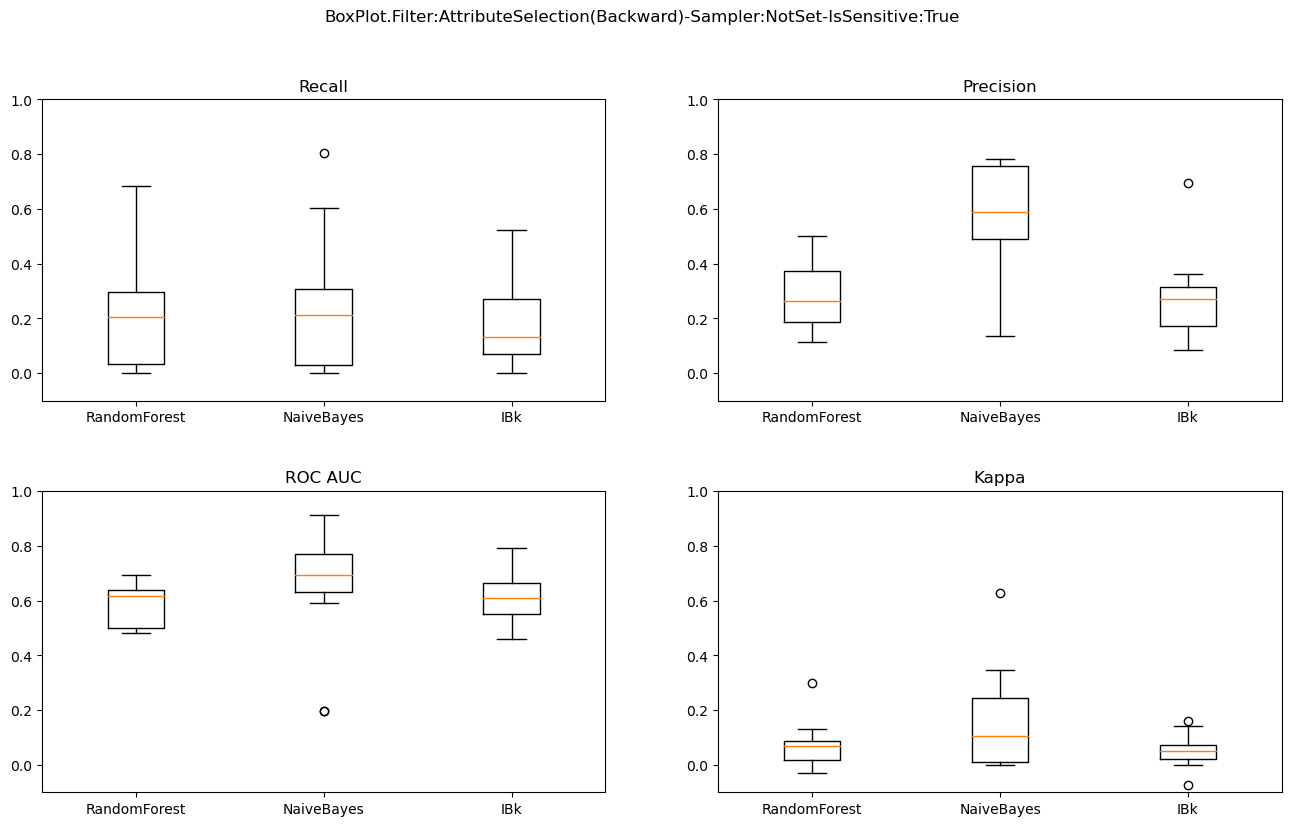

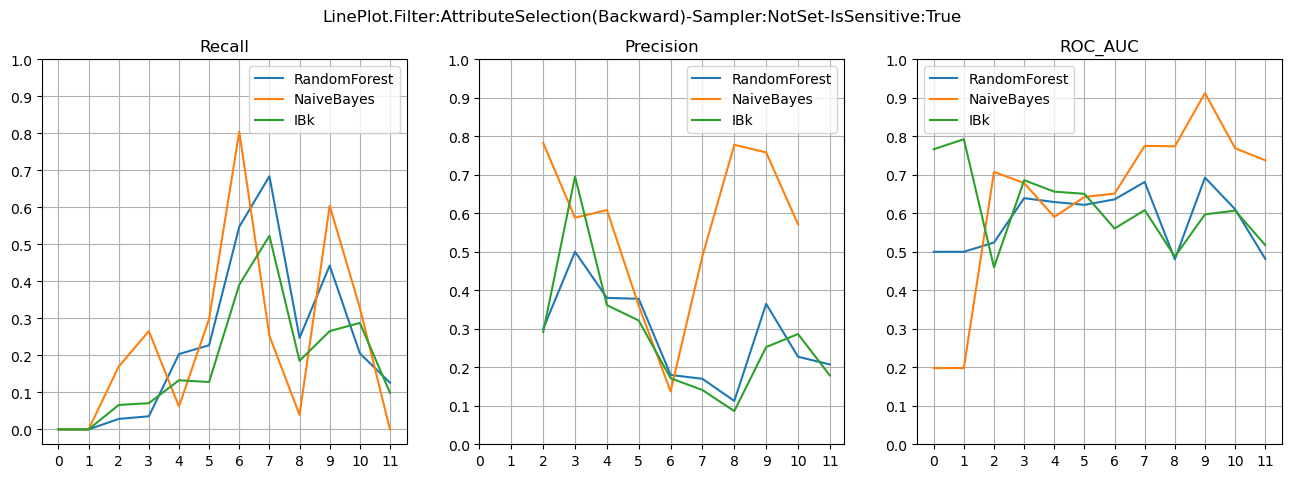

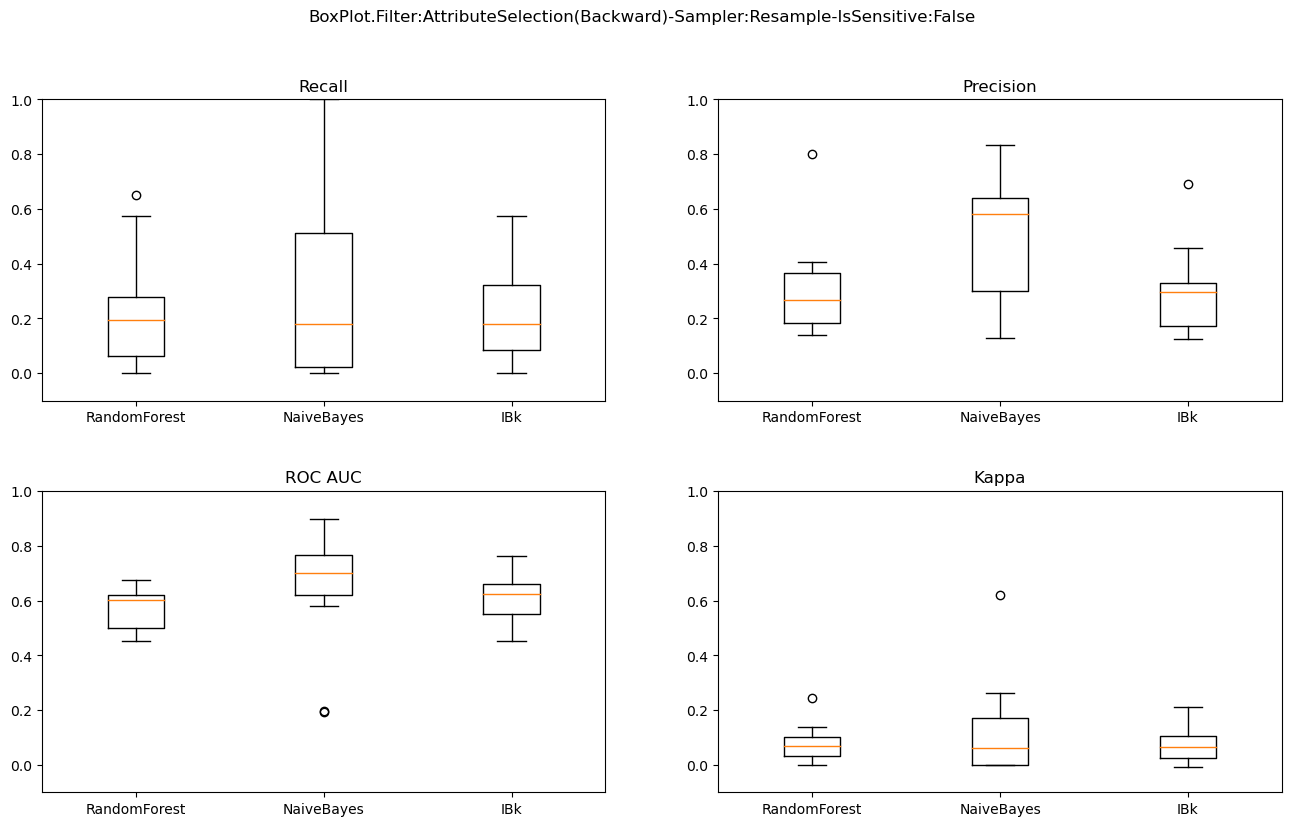

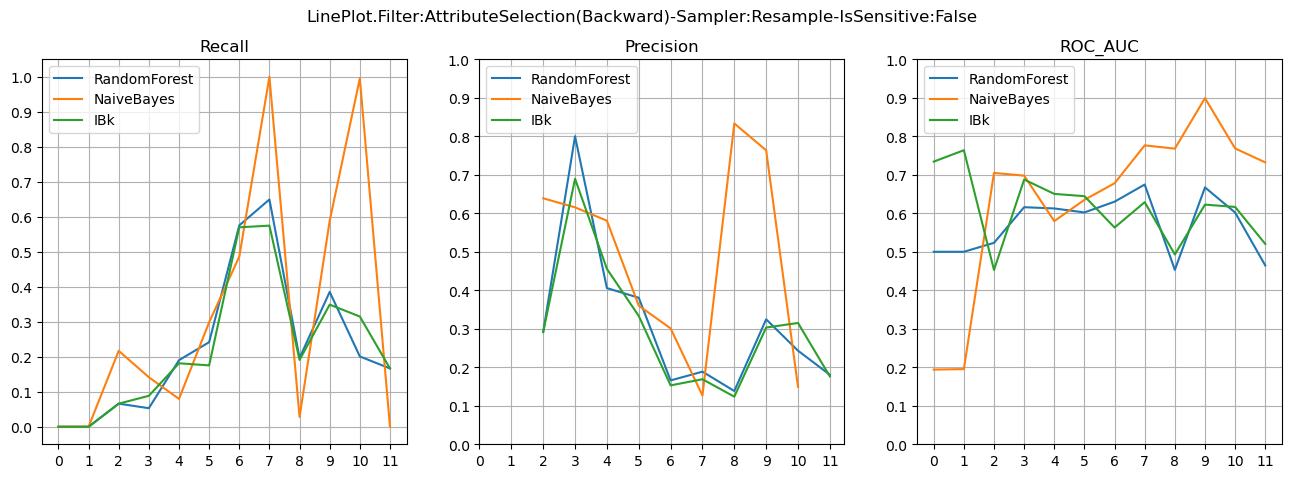

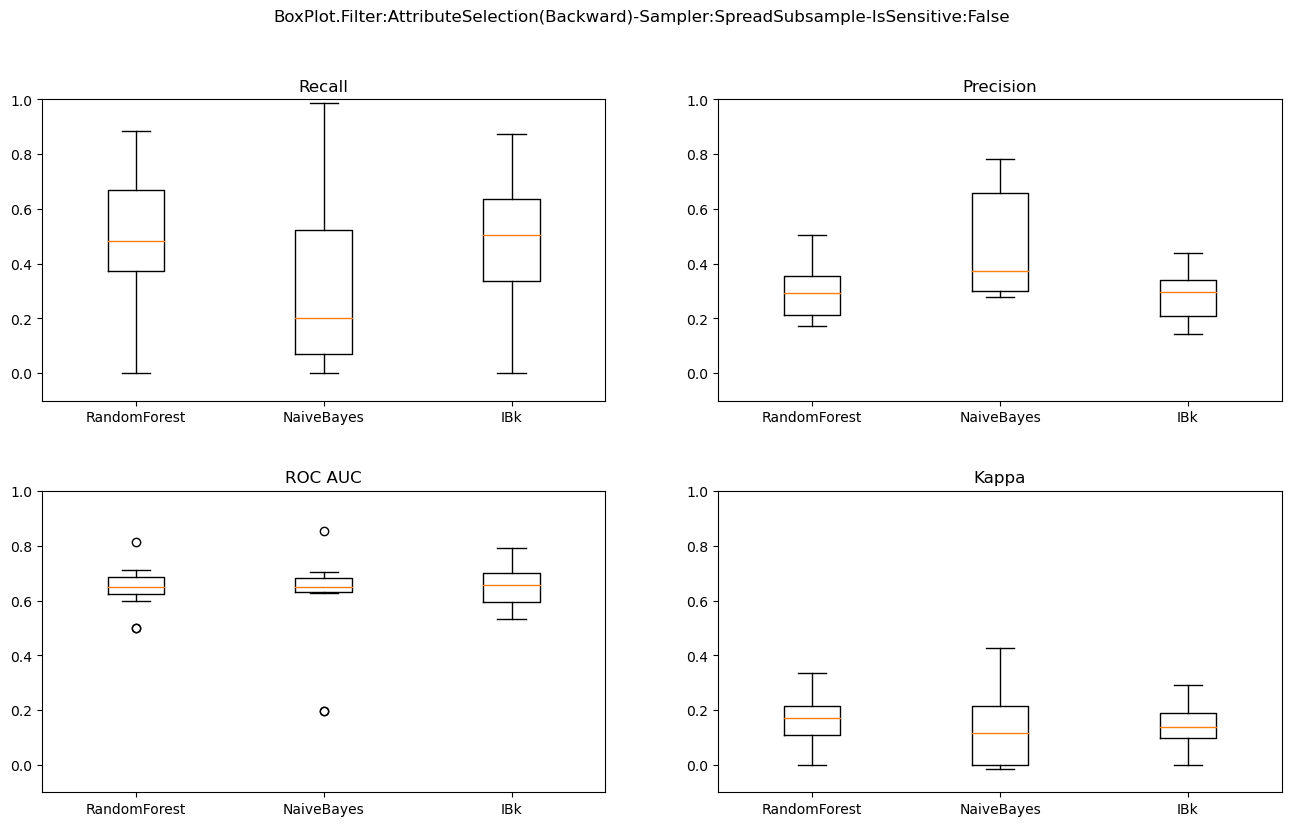

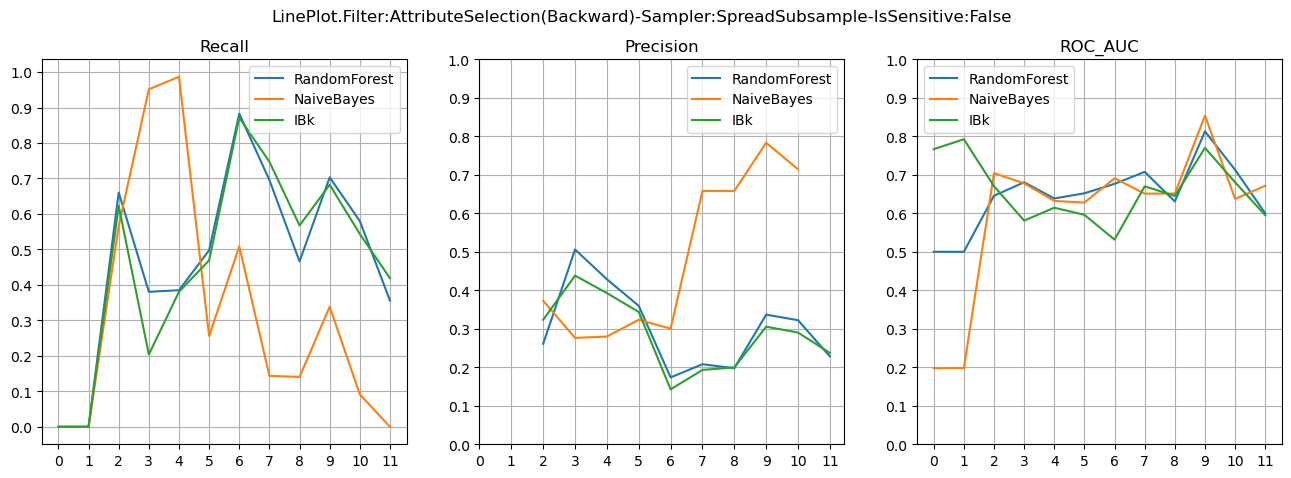

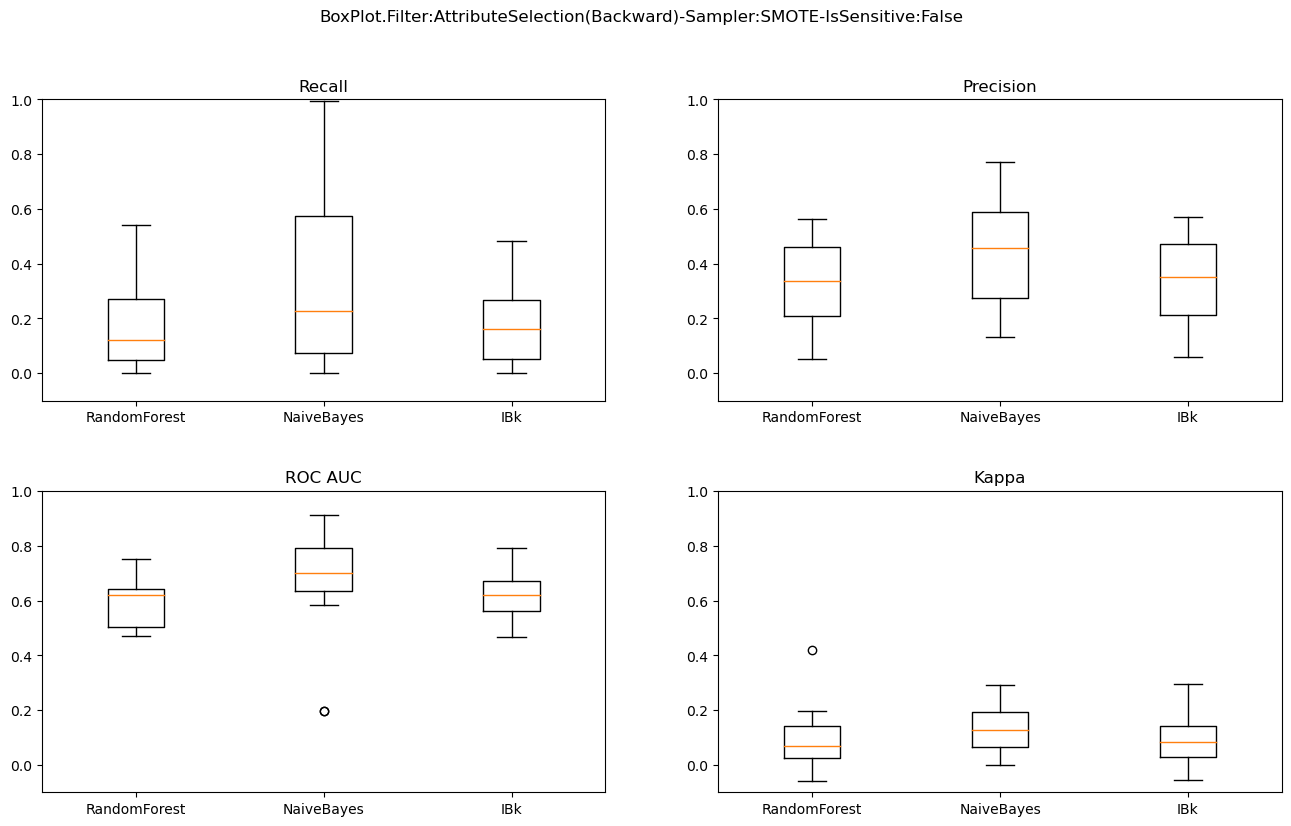

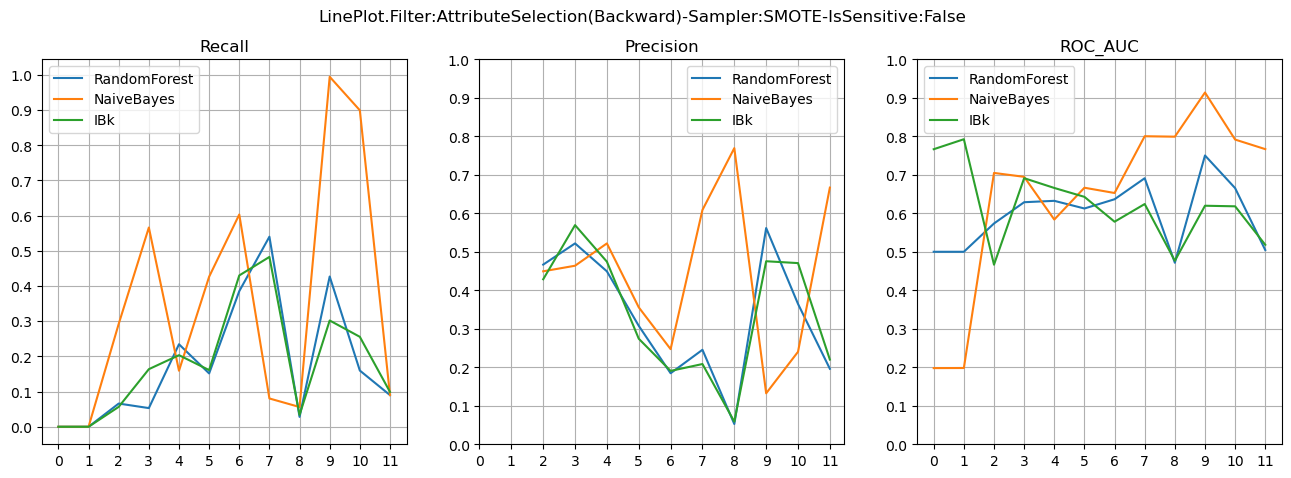

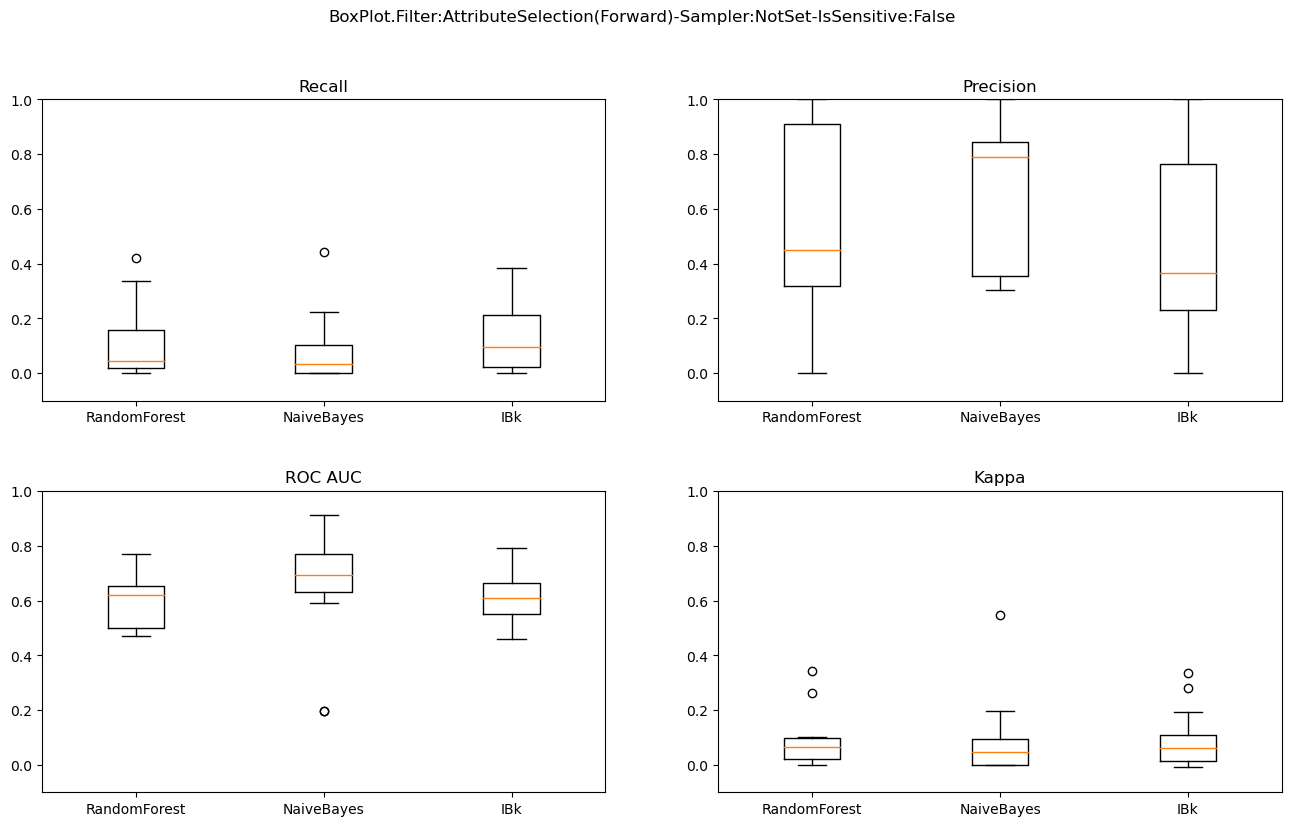

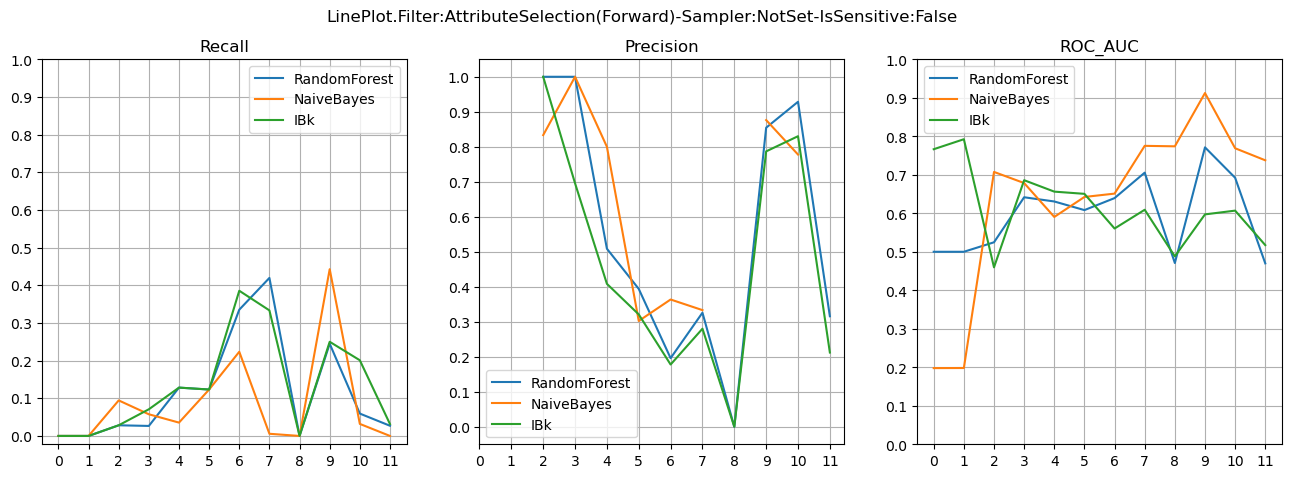

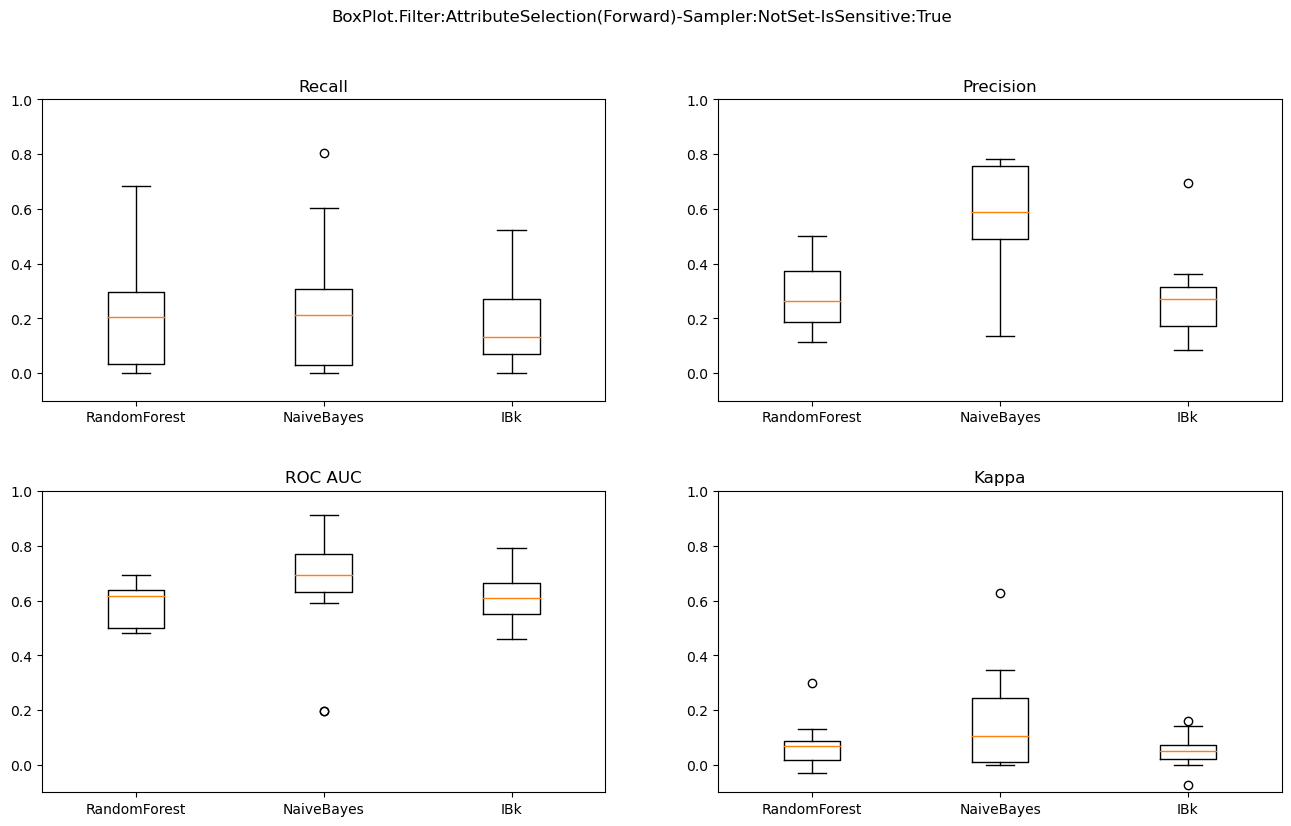

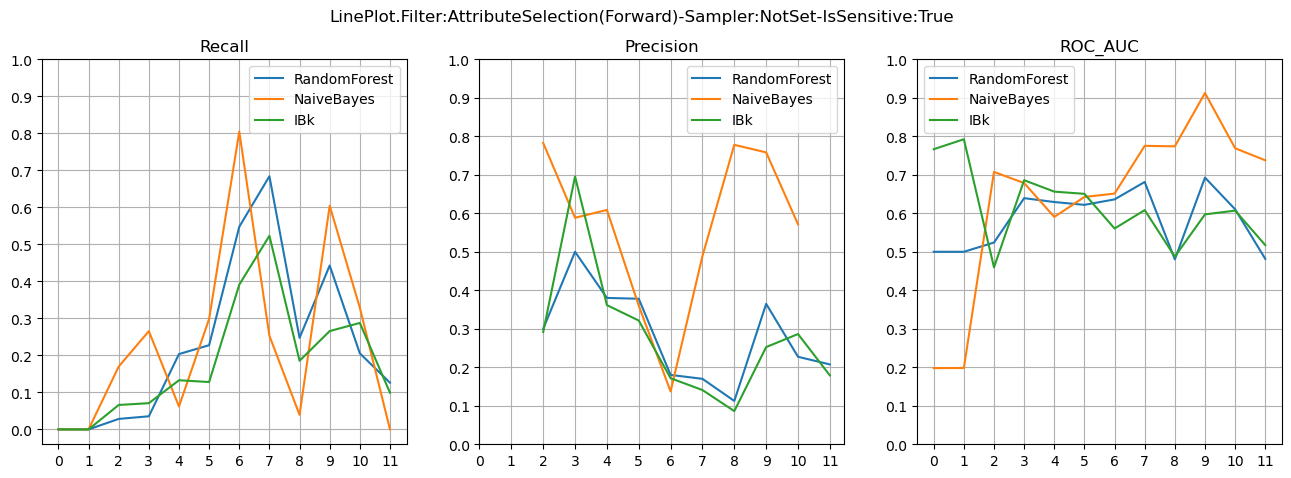

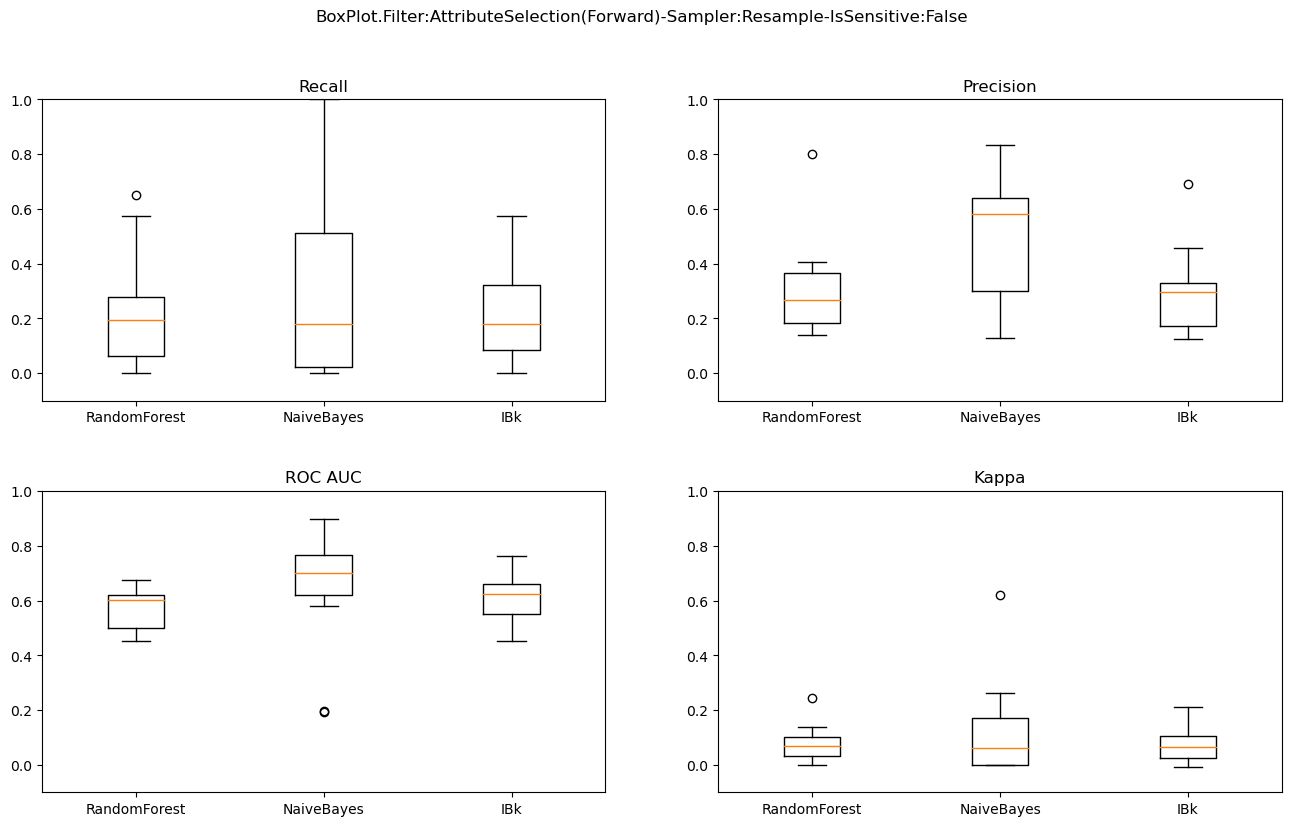

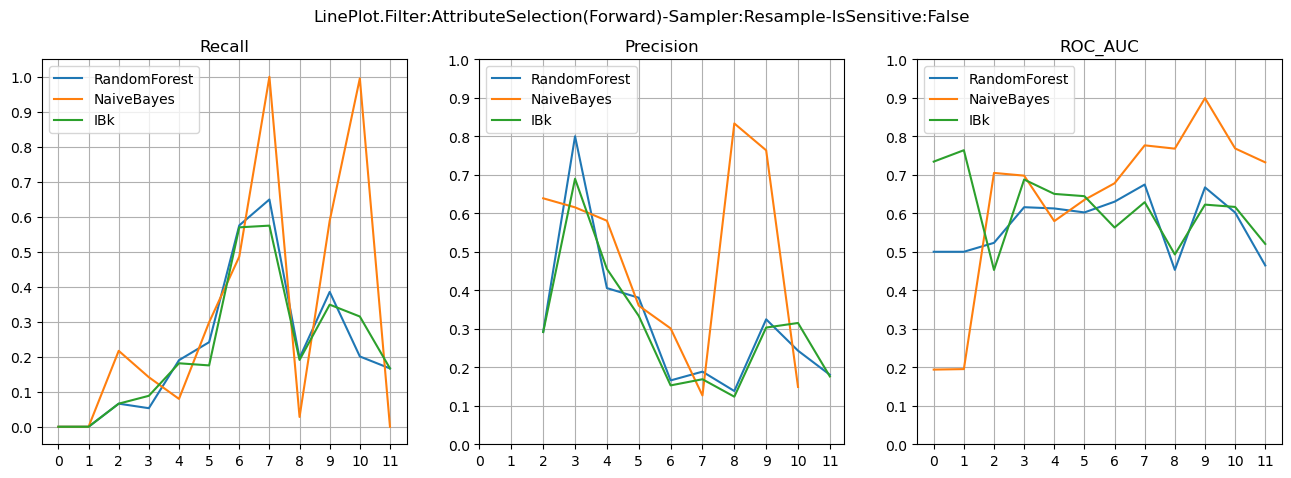

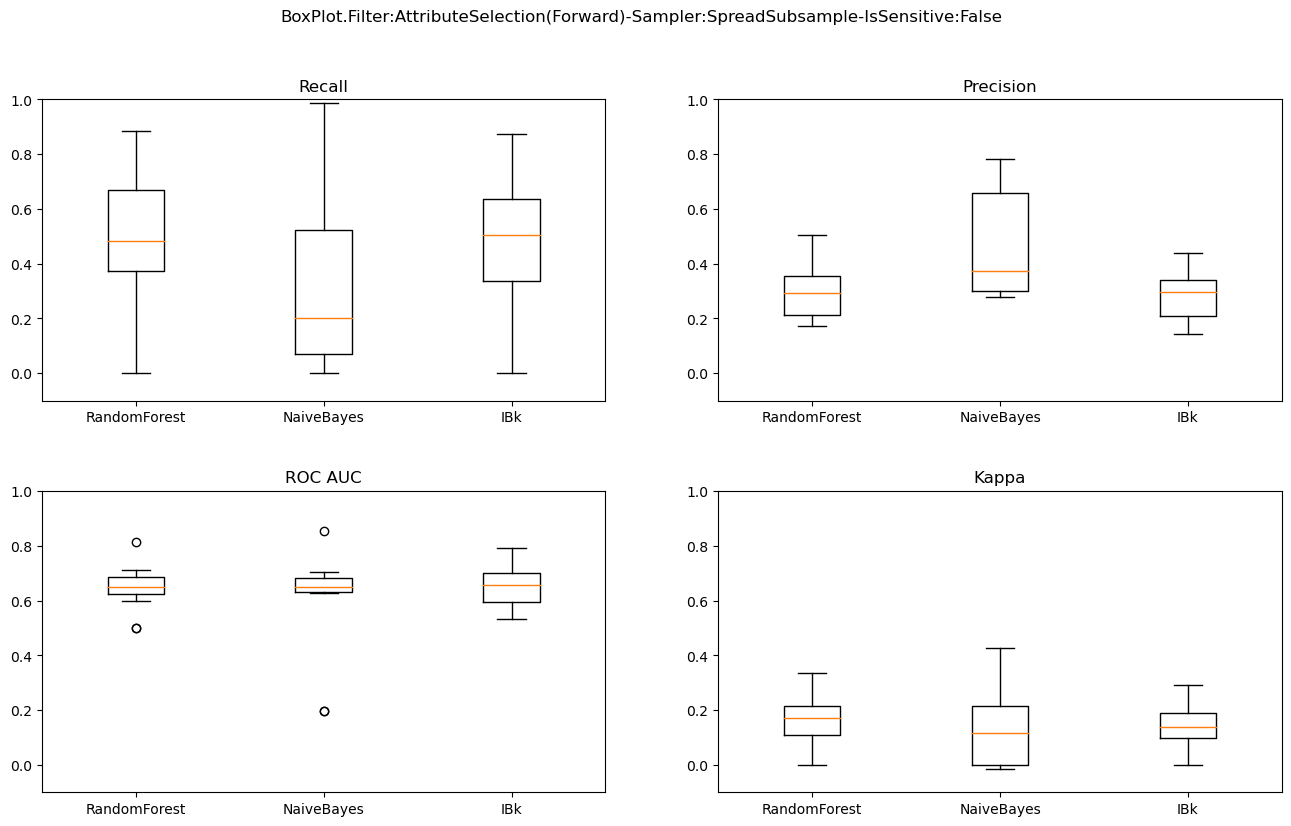

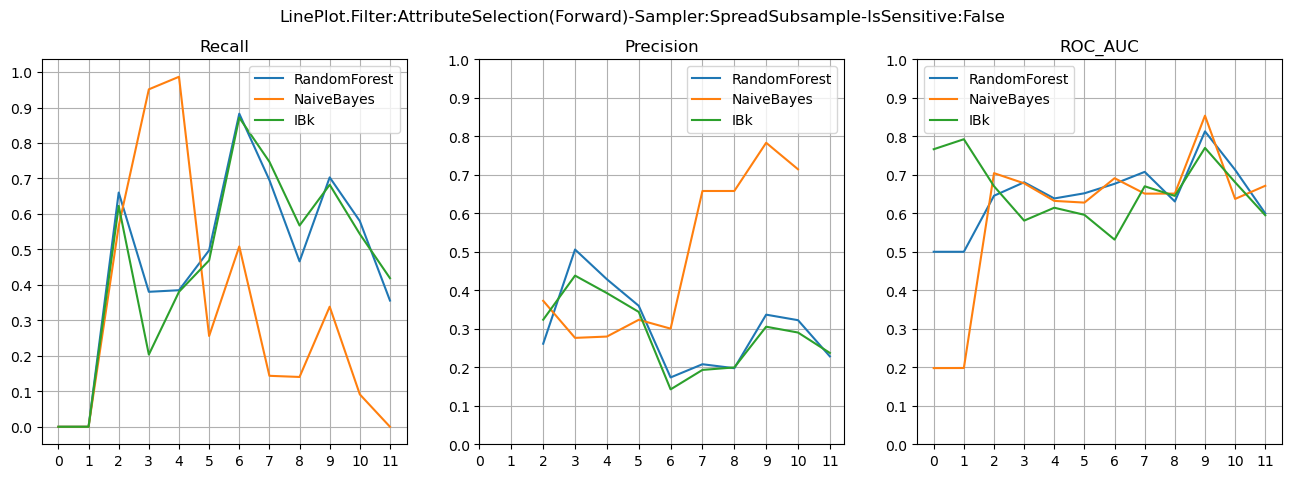

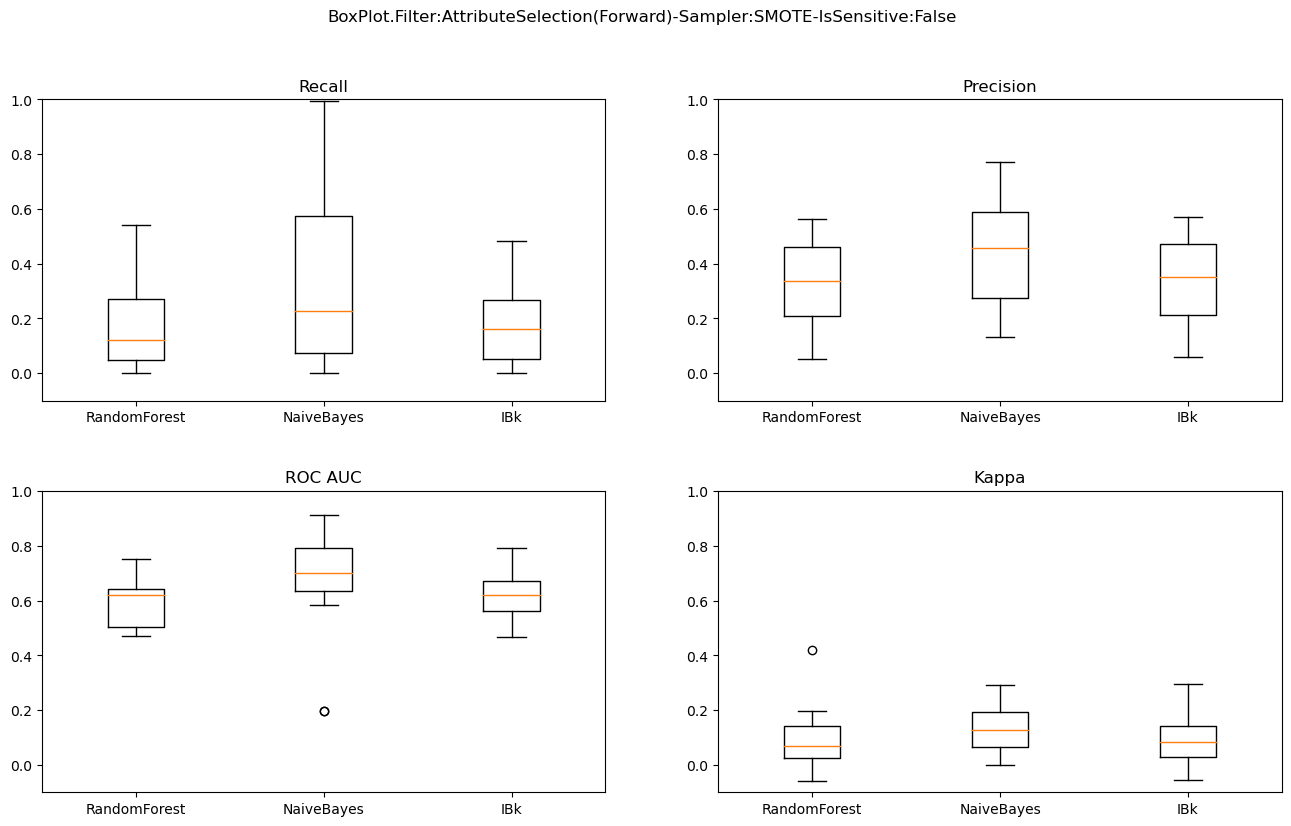

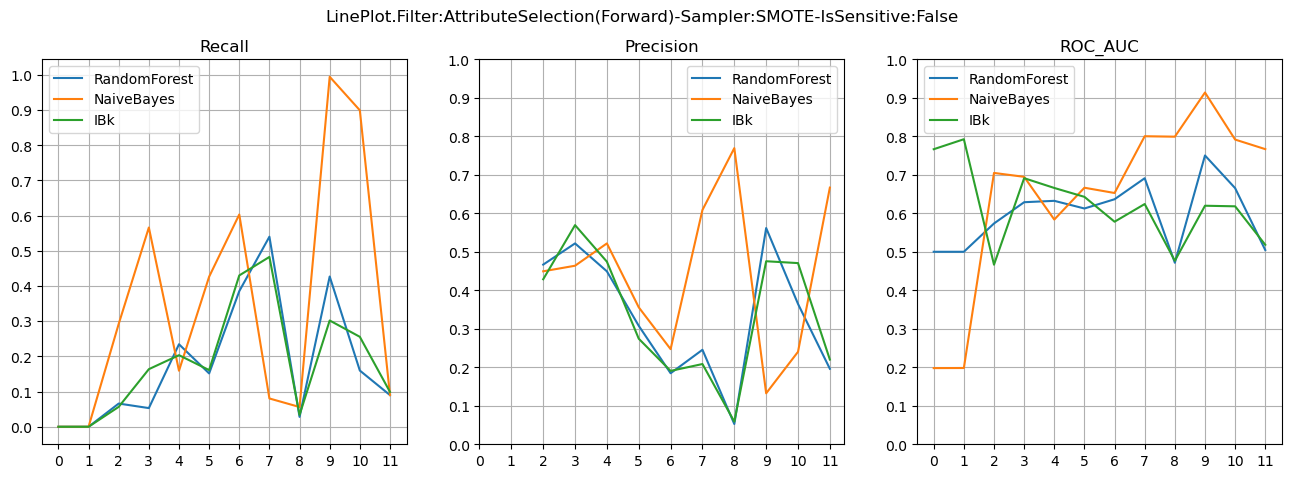

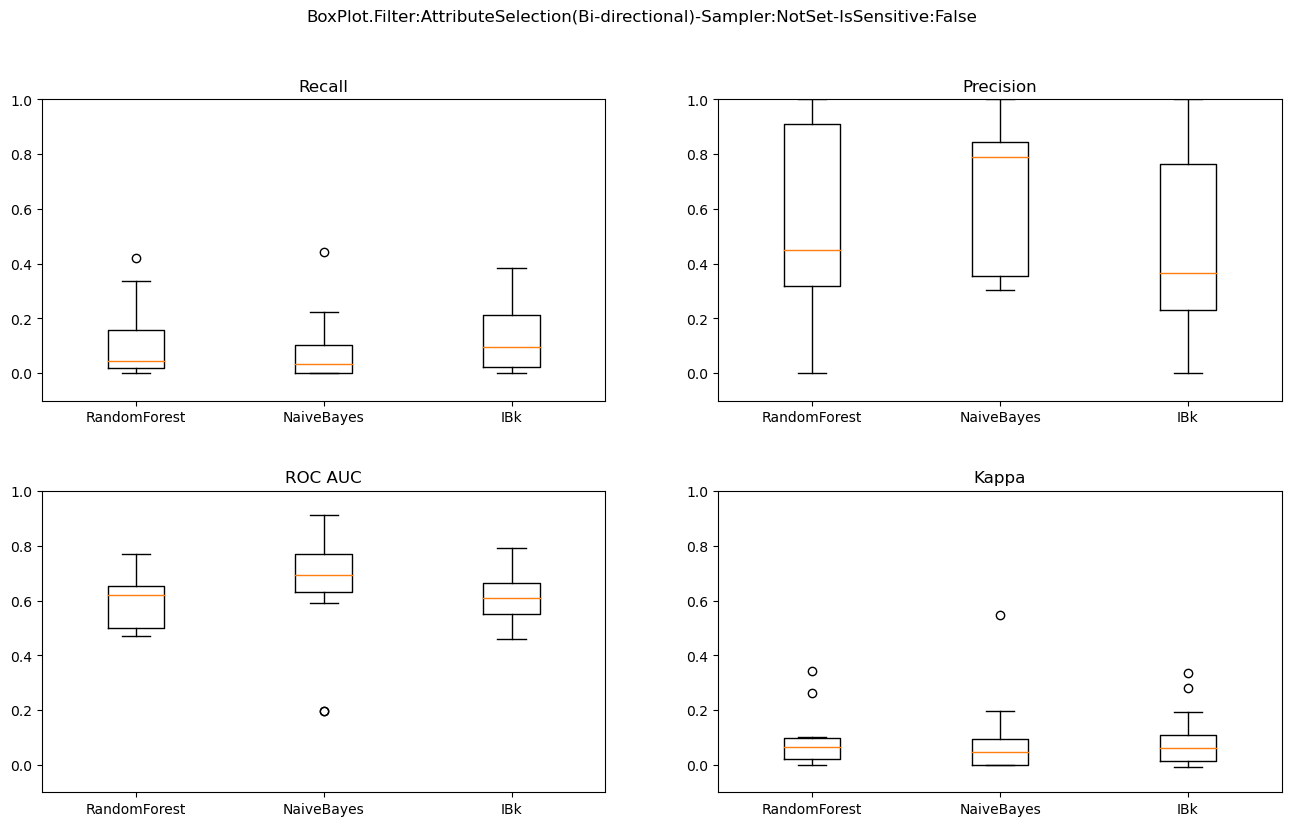

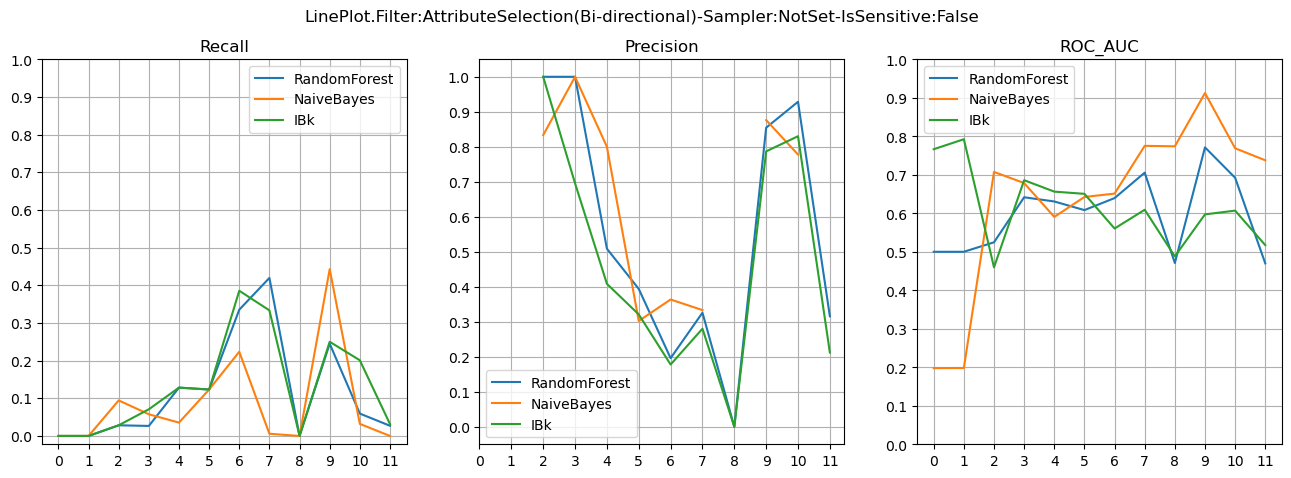

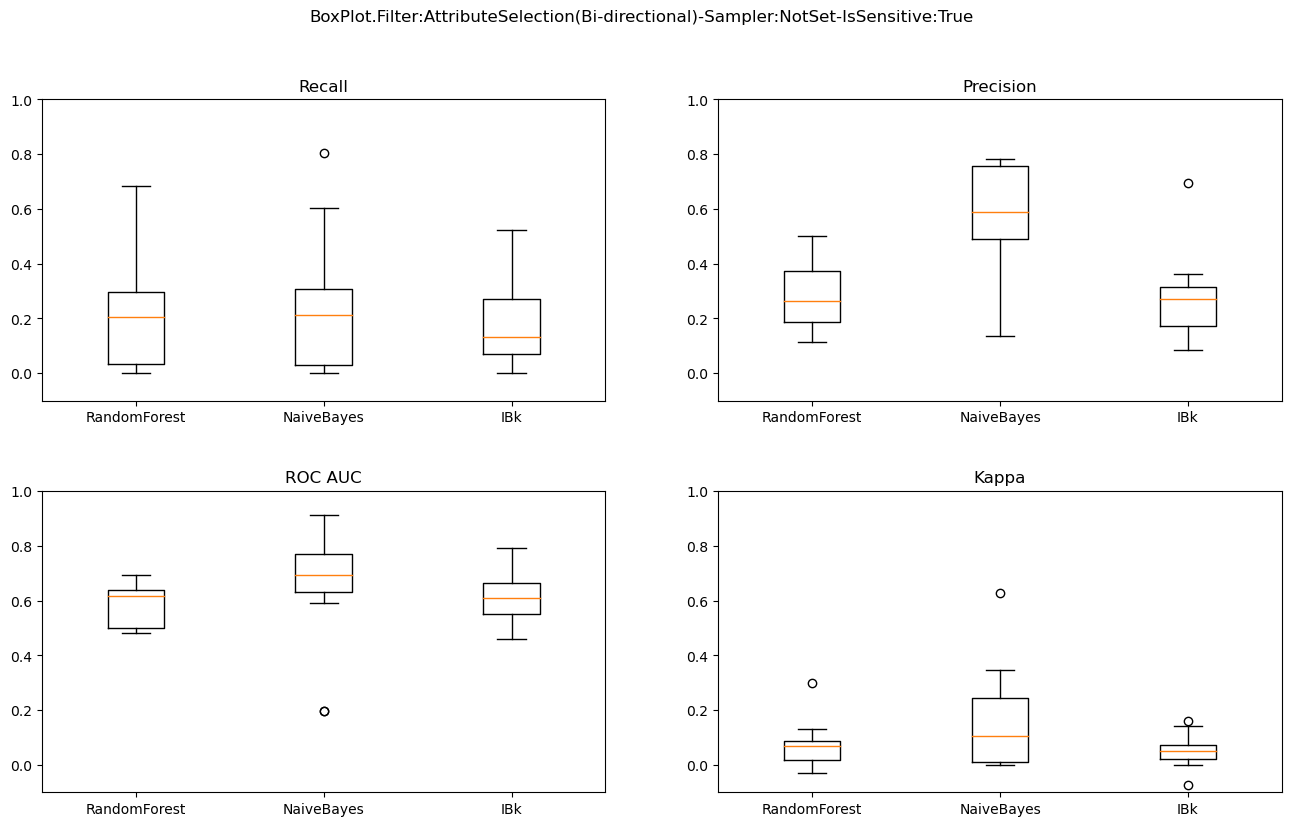

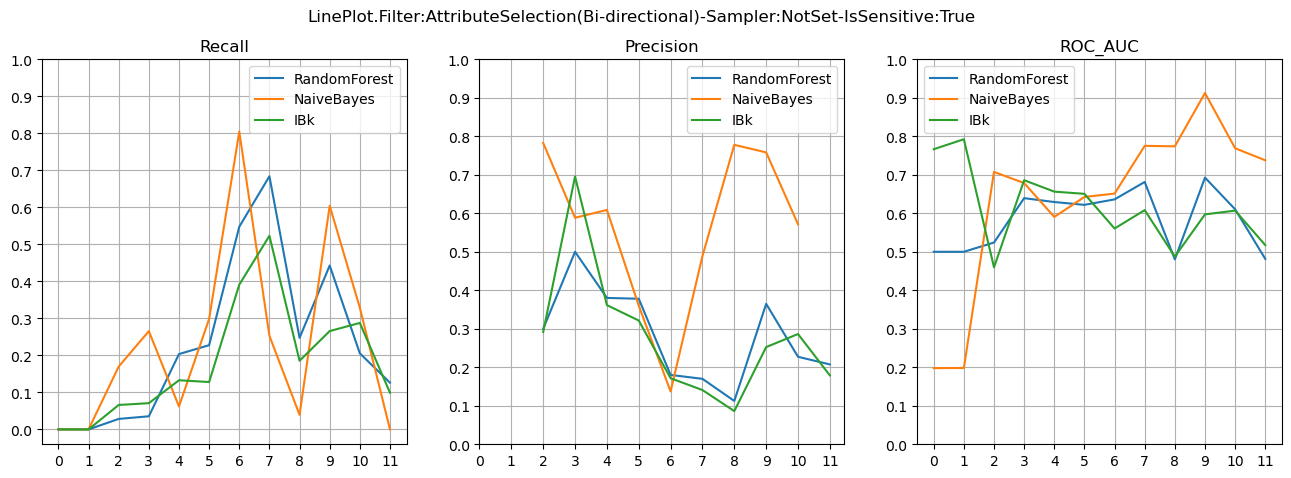

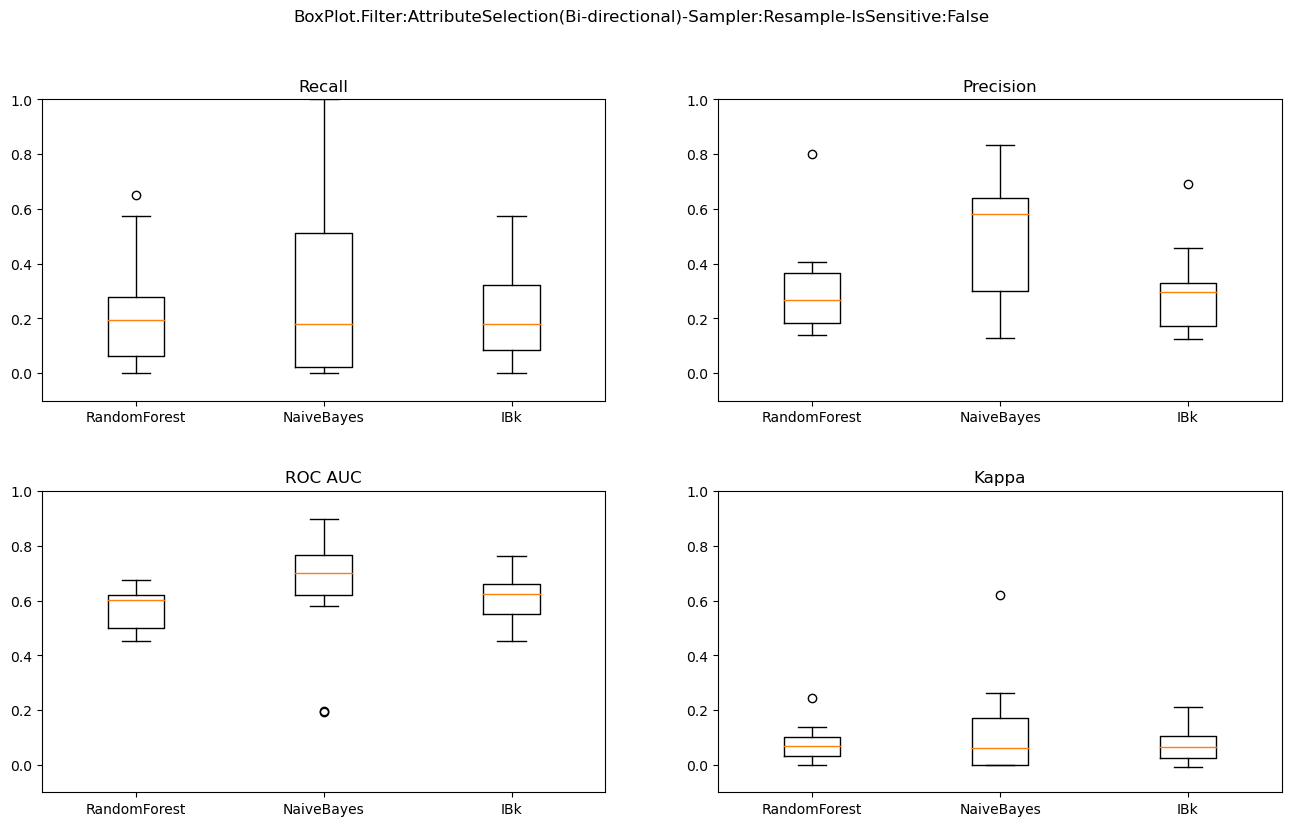

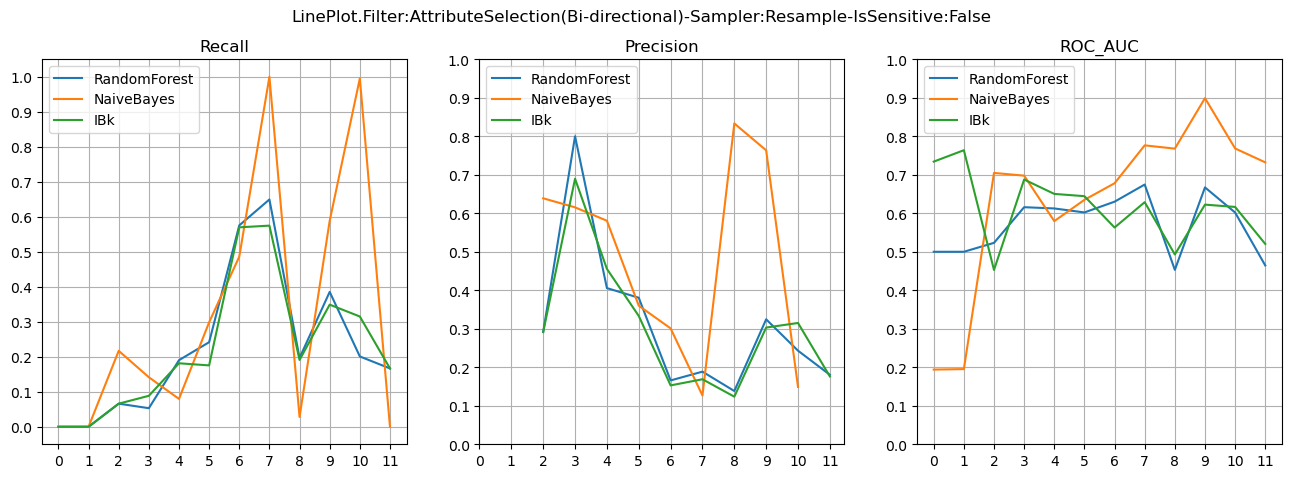

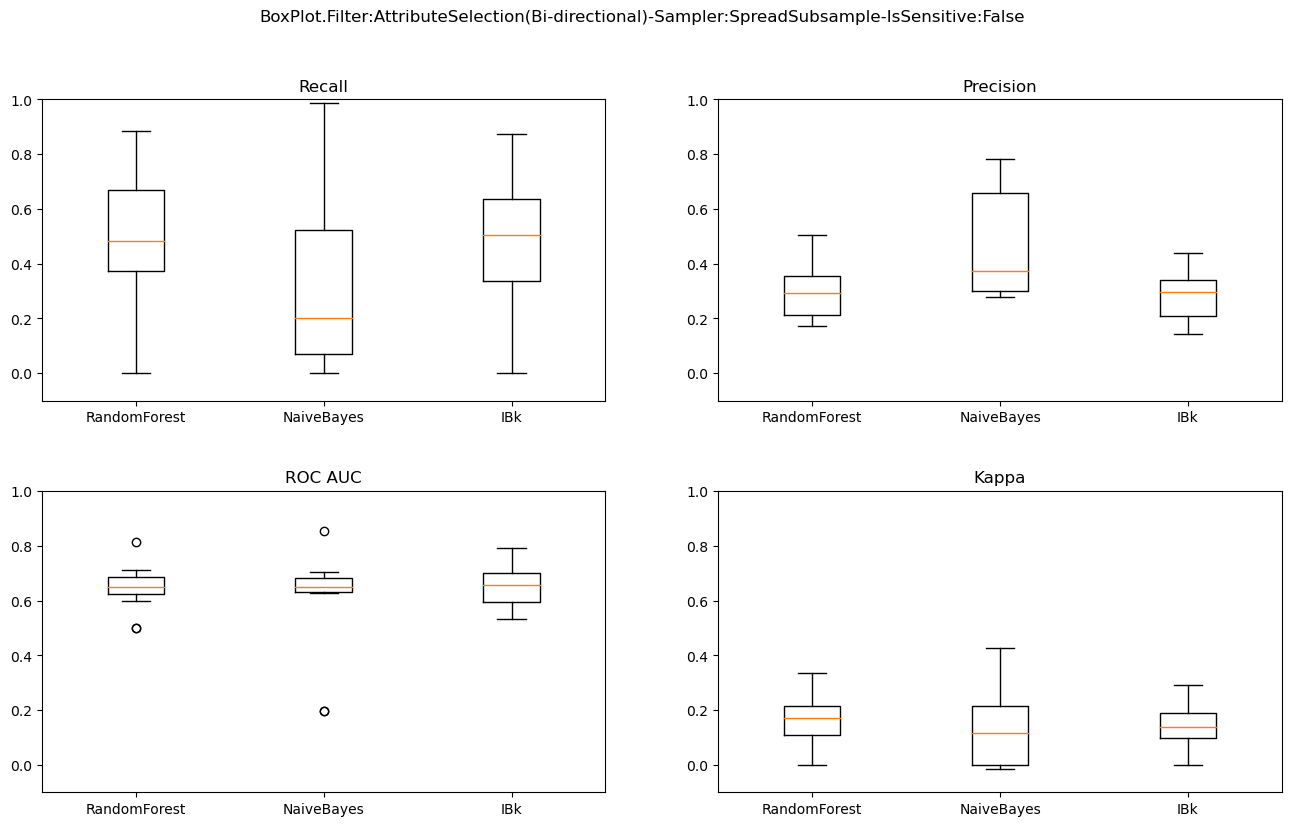

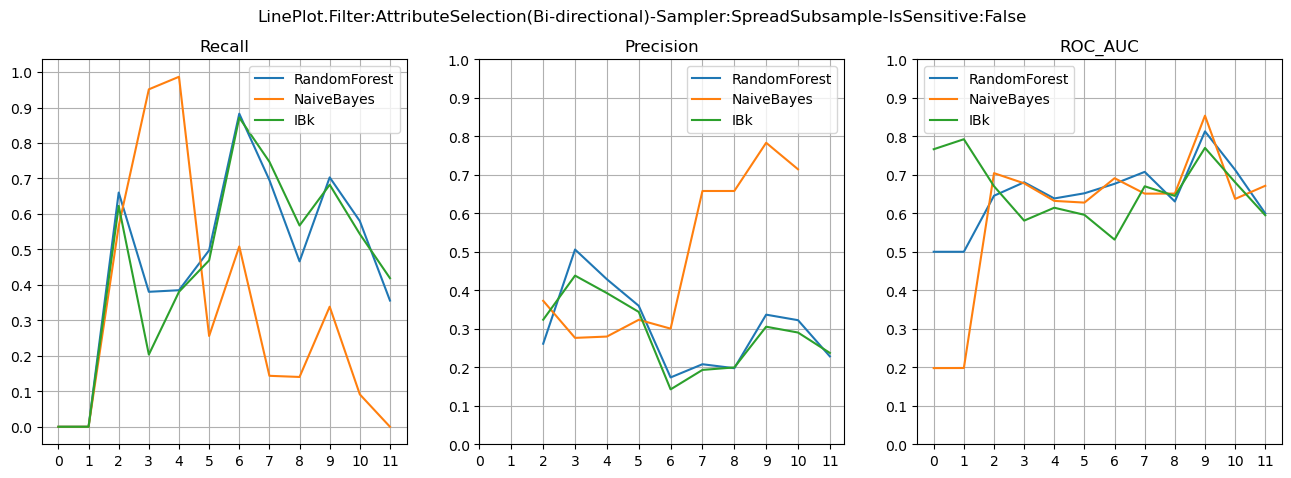

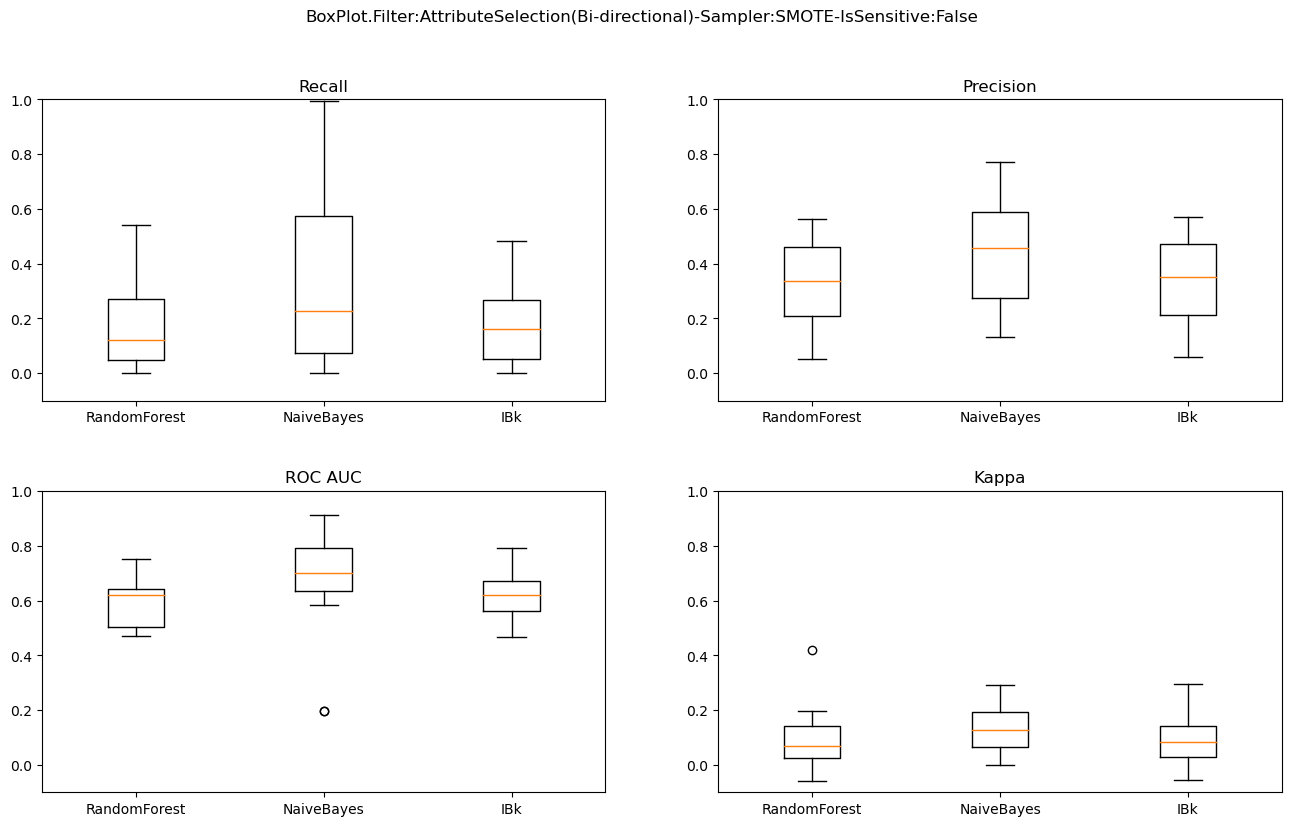

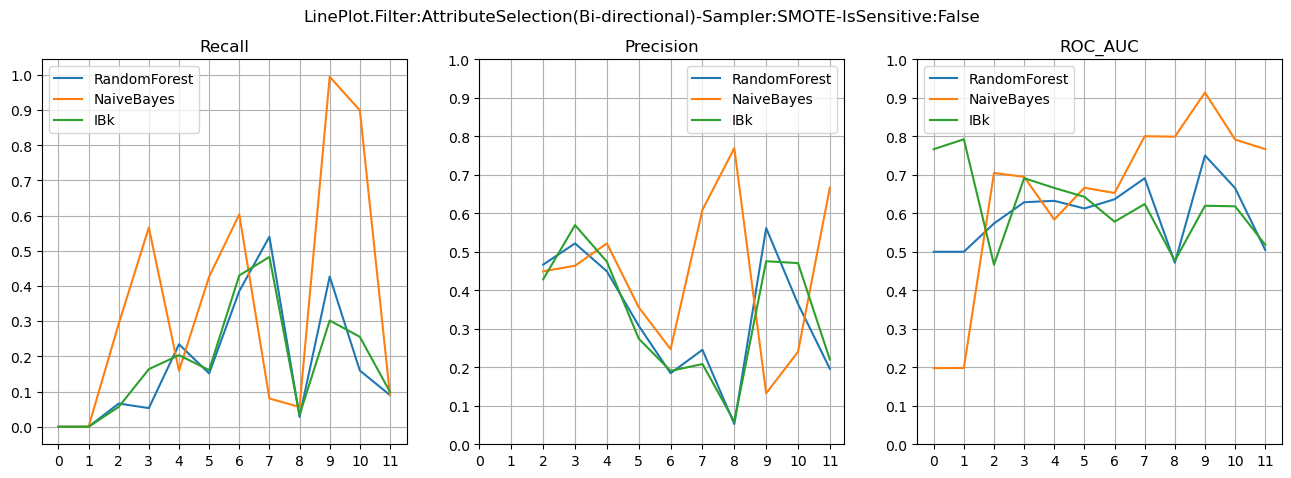

In [132]:
analyzeAllProjetcs()